<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

<h1><center>Deep Learning Foundation Project - DEFCON Level Classification</center><h1>

<center><img width=40% src="https://github.com/girishksahu/INSAID2022-DL-Foundation-DEFCON_Level_Classification/blob/SMART_Street/defcon_logo.png?raw=true"></center>

----
### **Table of Content**
----

**1**. [**Introduction**](#section1)<br>
  - **1.1** [**Problem Statement**](#section11)<br>
  - **1.2** [**Importing Libraries**](#section12)<br>
  
**2**. [**The Dataset**](#section2)<br>
  - **2.1** [**Load Dataset**](#section21)<br>
  - **2.2** [**Data Description**](#section22)<br>
  - **2.3** [**Dataset Structure**](#section23)<br>
  
**3**. [**Data Pre-Processing**](#section3)<br>
  - **3.1** [**Data Pre-Profiling**](#section31)<br>
  - **3.2** [**Data Pre-Processing**](#section32)<br>
  - **3.3** [**Data Post-Profiling**](#section26)<br>
  
**4**. [**Exploratory Data Analysis**](#section4)<br>

**5**. [**The Model**](#section5)<br>

<a name=section1></a>

----
## **1. Introduction**
----

- Your client for this project is a major modern armament manufacturer.
    - Military conflict is an intense state of violence. In such situations, it is crucial for a nation to stay alert, cope with it, and mitigate its implications.
    - The US government has set up the DEFCON (Defense Readiness Condition) warning system.
    - This alert system is used to gauge the level of alertness of the defence forces.
    - It consists of five levels of readiness for the military forces to be prepared for the consequences of the conflict.

**<h3>Current Scenario:</h3>**

- The government is trying to build a better defence system by automating most of the process.
- One of the processes they are working on is the DEFCON (Defence Readiness Condition) alert system. 
- The DEFCON system allows the nation’s forces to be a step ahead of its rivals.

---
<a name = section11></a>
### **1.1 Problem Statement**
---

- **The current process suffers from the following problems:**
   - The US government has created a DEFCON alert system previously but they have to go through a manual check to gauge the level of the DEFCON.

    - Due to these reasons, it is quite difficult to have an efficient prediction of the DEFCON level.

 - The company has hired you as a data science consultant.

    - They want to automate the process of predicting the DEFCON level of the country security, based on the military data


### **Your Role**

- You are given a dataset containing information hat can be used to build a model that can accurately predict the DEFCON level raised as a result of the conflict.

- Your task is to build a classification model using the dataset.

     - Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition.  
     - You need to build the best possible model.

### **Project Deliverables**
- Deliverable: **Predict the DEFCON level of a country.**

- Machine Learning Task: **Classification**

- Target Variable: **DEFCON_Level**

### **Evaluation Metric**

- The model evaluation will be based on the Accuracy score.

<center><img src="https://github.com/girishksahu/INSAID2022-DL-Foundation-DEFCON_Level_Classification/blob/SMART_Street/defence_prediction.jpg?raw=true" width="500" /></center>

---
<a name = section12></a>
### **1.2 Importing Libraries**
---

In [211]:
# To use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-m3vbx1sm
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-m3vbx1sm


In [212]:
!pip install sweetviz

In [213]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
import sklearn.metrics
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
# Importing WordCloud for text data visualization
from wordcloud import WordCloud

In [214]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [215]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


In [216]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

<a name=section2></a>

----
## **2. The Dataset**
----

- The Train dataset contains all the necessary information that can be used to build a model that can accurately predict the DEFCON level raised as a result of the conflict.


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 8000 | 13 | 1.9+ MB| 

<br>

| ID | Feature Name | Description of the feature |
| :-- | :--| :--| 
|01| **Allied_Nations**   | The number of nations that have joined together as allies          |
|02| **Diplomatic_Meetings_Set** | The number of meetings with the intent to resolve the conflict that is planned       |
|03| **Percent_Of_Forces_Mobilized**   | Same as the name of the variable                  |
|04| **Hostile_Nations** | The number of enemy nations that have allied together        |
|05| **Active_Threats**   | The number of situations or threats that require immediate attention             |
|06| **Inactive_Threats** | The number of situations or threats being monitored for activity or escalation             |
|07| **Citizen_Fear_Index**   | The percentage of citizens who fear catastrophic military conflicts                   |
|08| **Closest_Threat_Distance(km)** | The closest threat to the border of the country in question             |
|09| **Aircraft_Carriers_Responding**   | The number of aircraft carriers actively travelling towards a threat to neutralize it                   |
|10| **Troops_Mobilized(thousands)** | The number of troops that are activated and responding to the threats             |
|11| **DEFCON_Level**   | A numeric scale of conflict 'seriousness' with 1 being the least serious and 5 being the most                 |
|12| **Id** | An ID to aid a checker script            |

- The **Test dataset** contains all the necessary information that can be used to predict the DEFCON level raised as a result of the conflict.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 2000 | 12 | TBD MB | 

<br>


<a name=section21></a>

### **2.1 Load Dataset**

- Load dataset and check shape of dataset.

In [217]:
# Load train dataset
train_df = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2022-DL-Foundation-DEFCON_Level_Classification/SMART_Street/DEFCON_train.csv", index_col='Id')

# Get the dimesions of data
print('Shape of the Training and Validation dataset:', train_df.shape)
# Get the structure of data
train_df.info()

# Output first 10 data rows
train_df.head(10)


Shape of the Training and Validation dataset: (8000, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 1775 to 4105
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Allied_Nations                8000 non-null   int64  
 1   Diplomatic_Meetings_Set       8000 non-null   int64  
 2   Percent_Of_Forces_Mobilized   8000 non-null   float64
 3   Hostile_Nations               8000 non-null   int64  
 4   Active_Threats                8000 non-null   float64
 5   Inactive_Threats              8000 non-null   float64
 6   Citizen_Fear_Index            8000 non-null   float64
 7   Closest_Threat_Distance(km)   8000 non-null   float64
 8   Aircraft_Carriers_Responding  8000 non-null   int64  
 9   Troops_Mobilized(thousands)   8000 non-null   float64
 10  DEFCON_Level                  8000 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 750.0 KB


,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level
Id,,,,,,,,,,,
1775,9,1,0.30,6,19.0,56.0,0.919971,368.88,1,924000.0,2
910,8,0,0.26,2,4.0,11.0,0.450073,359.34,1,924000.0,2
4767,9,0,0.57,2,18.0,44.0,0.452276,364.64,1,1020800.0,3
5019,10,0,0.46,2,5.0,12.0,0.541850,322.24,1,897600.0,5
9006,12,1,0.50,1,10.0,17.0,0.685022,340.26,1,950400.0,2
7369,8,1,0.00,2,30.0,45.0,0.364905,345.56,1,1012000.0,4
9062,7,0,0.33,2,9.0,46.0,0.528634,367.82,1,924000.0,2
8860,7,1,0.03,6,25.0,61.0,0.522026,364.64,1,941600.0,2
7742,12,0,0.49,2,5.0,15.0,0.729075,338.14,1,809600.0,2


In [218]:
# Check for any missing values
any(train_df.isna().sum())

False

In [219]:
#check if any duplicate row
any(train_df.duplicated())

True

In [220]:
# Load test dataset
test_df = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2022-DL-Foundation-DEFCON_Level_Classification/SMART_Street/DEFCON_test.csv", index_col='Id')

# Get the dimesions of data
print('Shape of Test dataset:', test_df.shape)
# Get the structure of data
test_df.info()

# Output first 10 data rows
test_df.head(10)

Shape of Test dataset: (2000, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 11997 to 897
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Allied_Nations                2000 non-null   int64  
 1   Diplomatic_Meetings_Set       2000 non-null   int64  
 2   Percent_Of_Forces_Mobilized   2000 non-null   float64
 3   Hostile_Nations               2000 non-null   int64  
 4   Active_Threats                2000 non-null   float64
 5   Inactive_Threats              2000 non-null   float64
 6   Citizen_Fear_Index            2000 non-null   float64
 7   Closest_Threat_Distance(km)   2000 non-null   float64
 8   Aircraft_Carriers_Responding  2000 non-null   int64  
 9   Troops_Mobilized(thousands)   2000 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 171.9 KB


,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands)
Id,,,,,,,,,,
11997,13,1,0.63,4,6.0,14.0,0.552863,316.94,1,1056000.0
6283,10,0,0.64,3,6.0,20.0,0.508811,349.80,1,1029600.0
9211,8,0,0.40,5,3.0,9.0,0.503671,358.28,1,1126400.0
9827,8,1,0.00,4,27.0,67.0,0.535242,336.02,1,827200.0
7564,8,1,0.22,2,20.0,38.0,0.470631,347.68,1,959200.0
5933,9,1,0.26,2,23.0,88.0,0.567548,348.74,1,836000.0
8695,10,0,0.42,2,4.0,17.0,0.560206,333.90,1,897600.0
8697,11,1,0.30,2,26.0,53.0,0.569016,333.90,1,880000.0
6232,8,0,0.68,8,26.0,91.0,0.567548,319.06,1,818400.0


In [221]:
# Check for any missing values
any(test_df.isna().sum())

False

In [222]:
#check if any duplicate row
any(test_df.duplicated())

False

<a name=section22></a>

### **2.2 Data Description**

- Get **information about the data** and capture observations.

In [223]:
#Basic statistical details for numeric variables
train_df.describe(include=[np.float64]).transpose()

,count,mean,std,min,25%,50%,75%,max
Percent_Of_Forces_Mobilized,8000.0,0.271124,0.196465,0.00,0.090000,0.260000,0.430000,1.00
Active_Threats,8000.0,15.764563,10.438006,1.00,7.000000,13.000000,21.000000,72.00
Inactive_Threats,8000.0,46.529750,33.890953,6.00,21.000000,37.000000,62.000000,289.00
Citizen_Fear_Index,8000.0,0.485911,0.135431,0.00,0.406021,0.486784,0.567548,1.00
Closest_Threat_Distance(km),8000.0,350.847678,16.197573,290.44,340.260000,350.860000,360.400000,425.06
Troops_Mobilized(thousands),8000.0,917919.750000,93055.016809,739200.00,836000.000000,897600.000000,976800.000000,1311200.00


In [224]:
#Basic statistical details for numeric variables
train_df.describe(include=[np.int64]).transpose()

,count,mean,std,min,25%,50%,75%,max
Allied_Nations,8000.0,8.315000,1.750331,5.0,7.0,8.0,9.0,16.0
Diplomatic_Meetings_Set,8000.0,0.524000,0.500455,0.0,0.0,1.0,1.0,2.0
Hostile_Nations,8000.0,2.499375,1.296422,1.0,2.0,2.0,3.0,16.0
Aircraft_Carriers_Responding,8000.0,0.890250,0.327060,0.0,1.0,1.0,1.0,2.0
DEFCON_Level,8000.0,2.616875,0.798699,1.0,2.0,3.0,3.0,5.0


In [225]:
#Basic statistical details for categorical variables
#train_df.describe(include=[object]).transpose()

<a name=section23></a>

### **2.3 Dataset Structure**

- Get **information about the dataset structure** and capture observations.

In [226]:
# display summary of dataset structure
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 1775 to 4105
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Allied_Nations                8000 non-null   int64  
 1   Diplomatic_Meetings_Set       8000 non-null   int64  
 2   Percent_Of_Forces_Mobilized   8000 non-null   float64
 3   Hostile_Nations               8000 non-null   int64  
 4   Active_Threats                8000 non-null   float64
 5   Inactive_Threats              8000 non-null   float64
 6   Citizen_Fear_Index            8000 non-null   float64
 7   Closest_Threat_Distance(km)   8000 non-null   float64
 8   Aircraft_Carriers_Responding  8000 non-null   int64  
 9   Troops_Mobilized(thousands)   8000 non-null   float64
 10  DEFCON_Level                  8000 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 750.0 KB


In [227]:
# Columns list can be handy and useful for further steps
train_df.columns

Index(['Allied_Nations', 'Diplomatic_Meetings_Set',
       'Percent_Of_Forces_Mobilized', 'Hostile_Nations', 'Active_Threats',
       'Inactive_Threats', 'Citizen_Fear_Index', 'Closest_Threat_Distance(km)',
       'Aircraft_Carriers_Responding', 'Troops_Mobilized(thousands)',
       'DEFCON_Level'],
      dtype='object')

In [228]:
# Get list of categorical variables
s = (train_df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
[]


In [229]:
# Get list of numerical variables
s = (train_df.dtypes == 'float64')
numeric_cols = list(s[s].index)

print("Numeric variables Float:")
print(numeric_cols)

Numeric variables Float:
['Percent_Of_Forces_Mobilized', 'Active_Threats', 'Inactive_Threats', 'Citizen_Fear_Index', 'Closest_Threat_Distance(km)', 'Troops_Mobilized(thousands)']


In [230]:
# Get list of numerical variables
s = (train_df.dtypes == 'int64')
numeric_int_cols = list(s[s].index)

print("Numeric variables Int:")
print(numeric_int_cols)

Numeric variables Int:
['Allied_Nations', 'Diplomatic_Meetings_Set', 'Hostile_Nations', 'Aircraft_Carriers_Responding', 'DEFCON_Level']


<a name = section3></a>

---
# **3. Data Pre-Processing**
---

<a name = section31></a>
### **3.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

                                             |          | [  0%]   00:00 -> (? left)


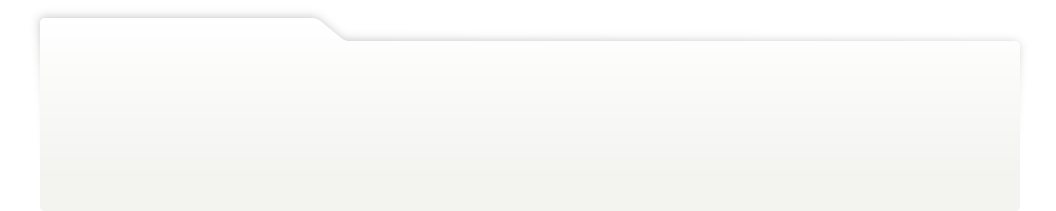
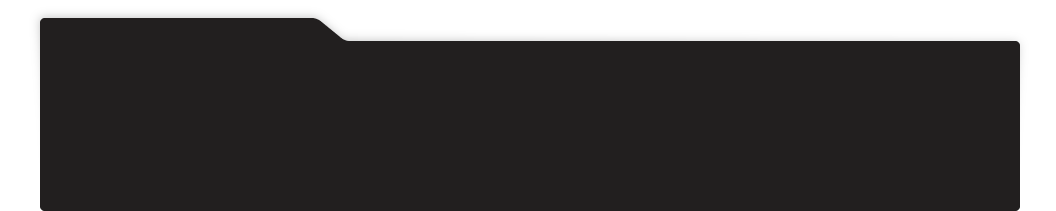
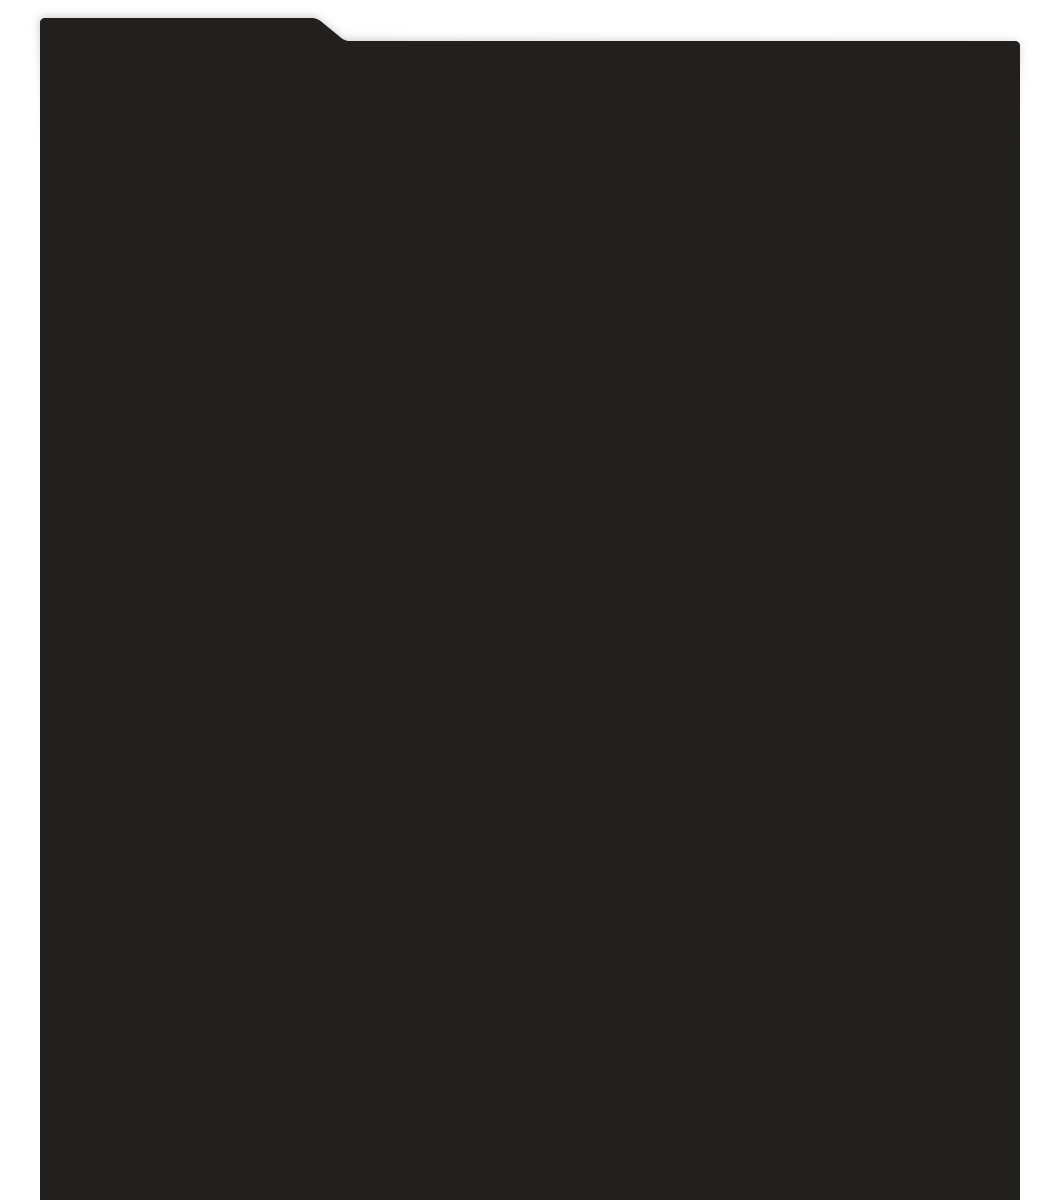
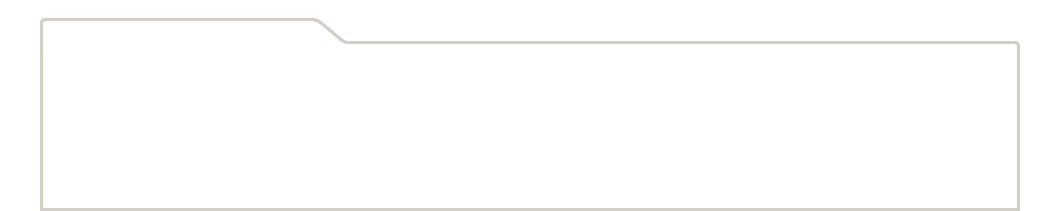
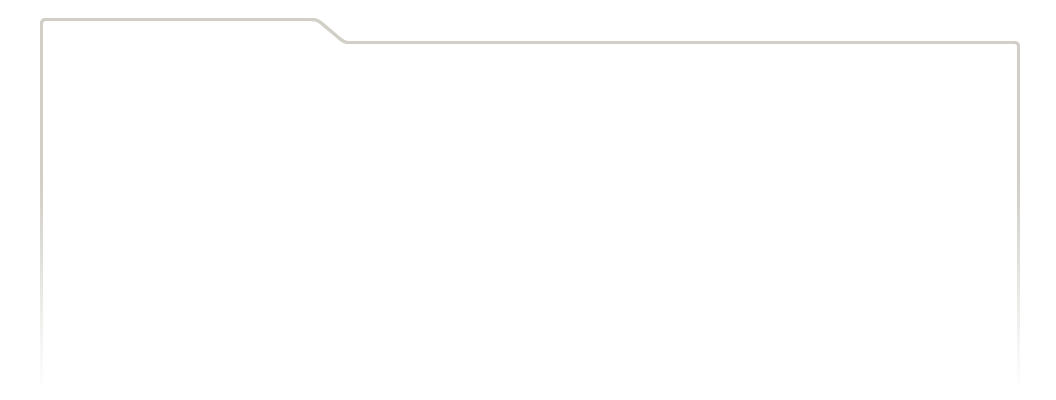
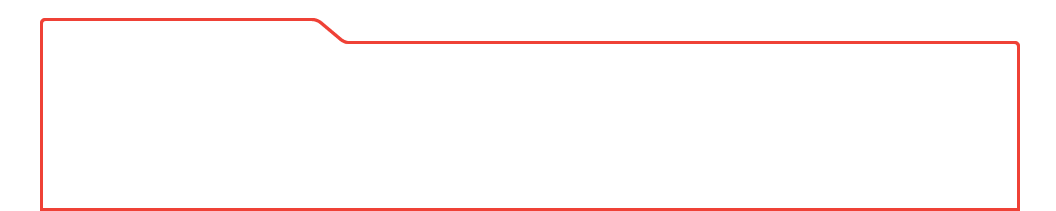
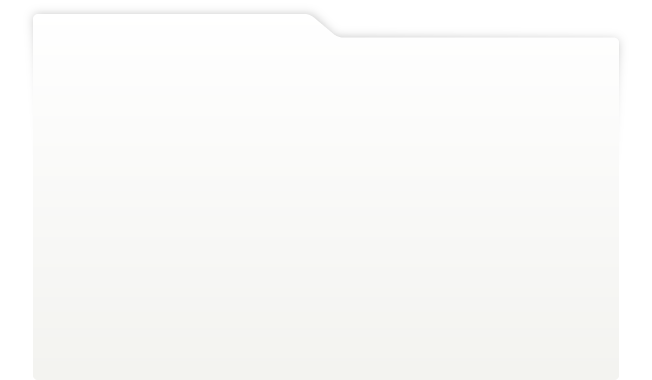
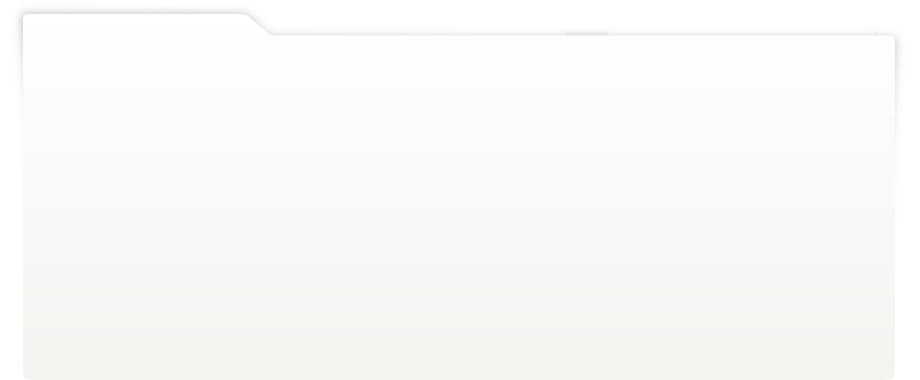
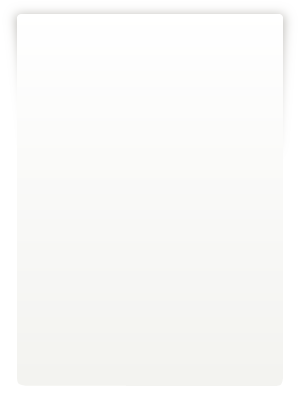
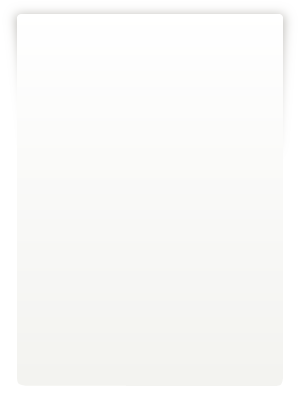
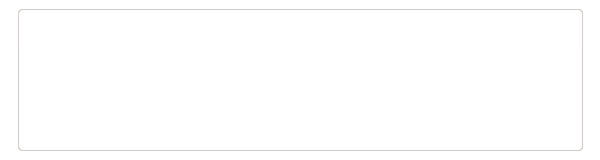
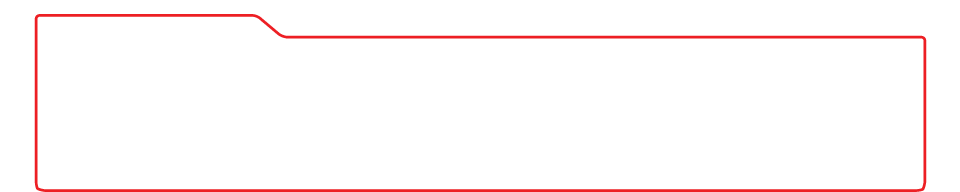
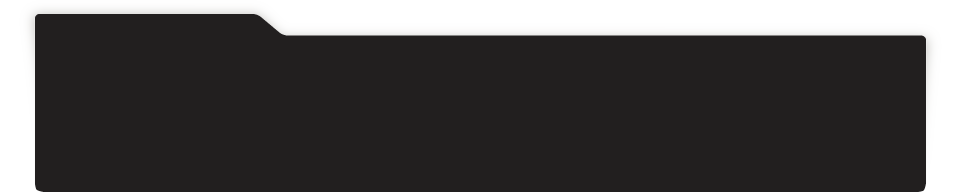
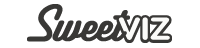
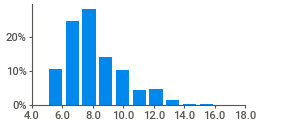
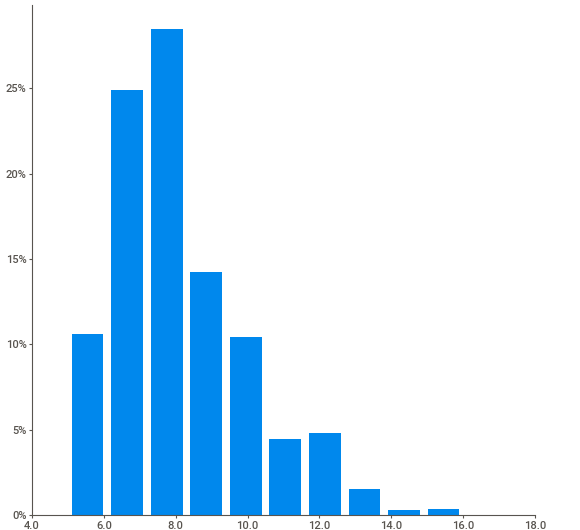
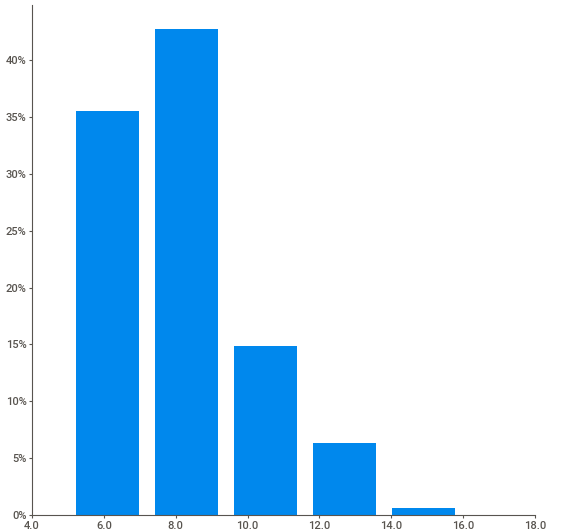
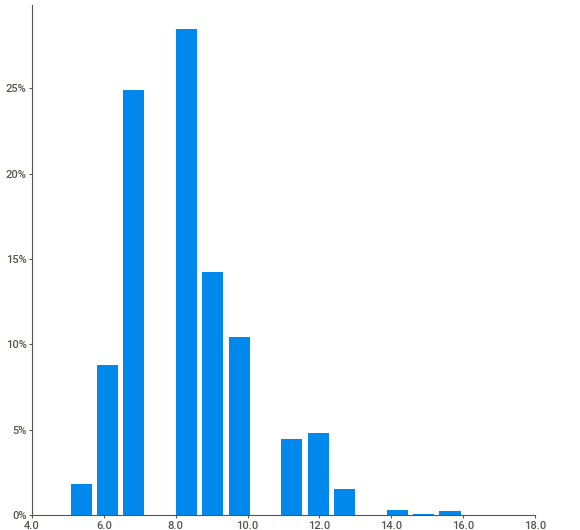
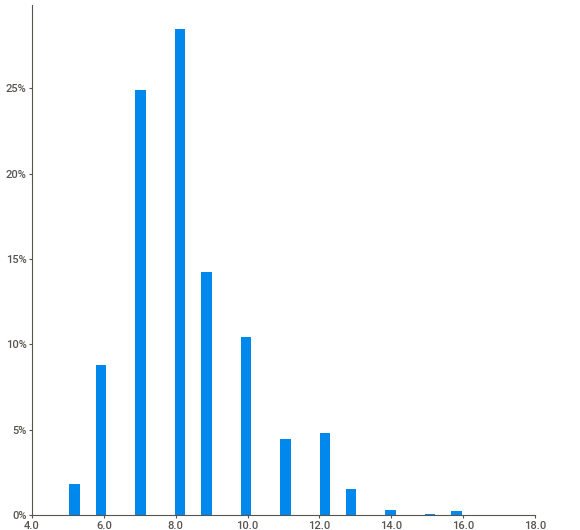
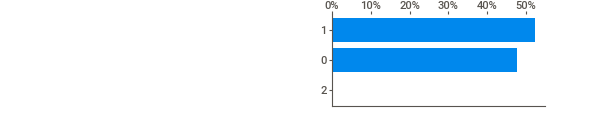
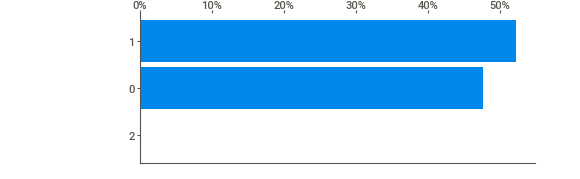
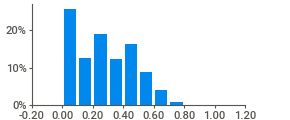
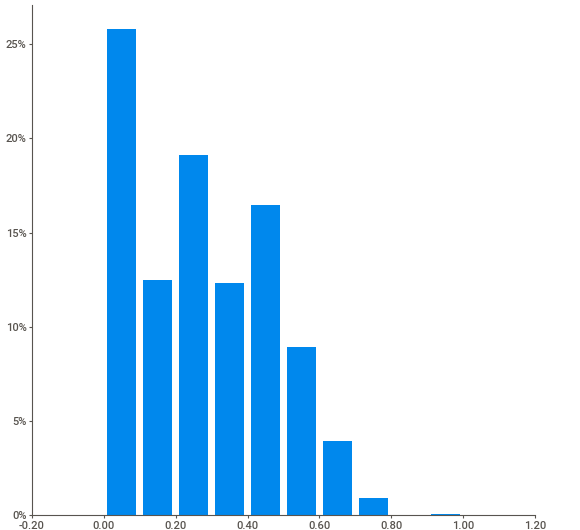
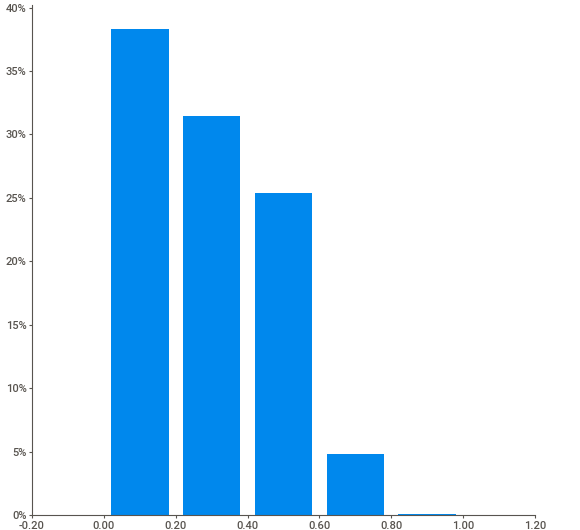
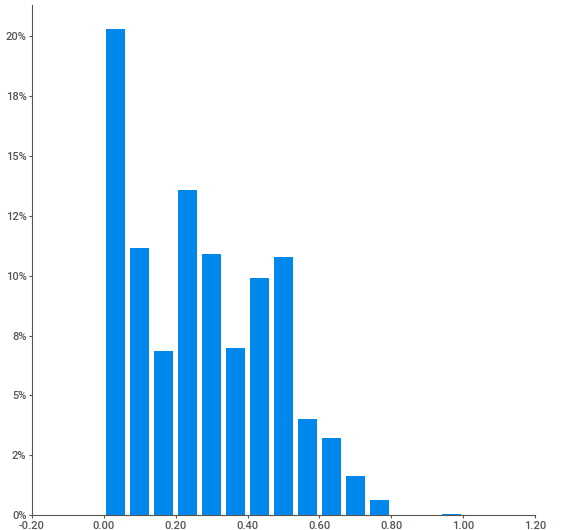
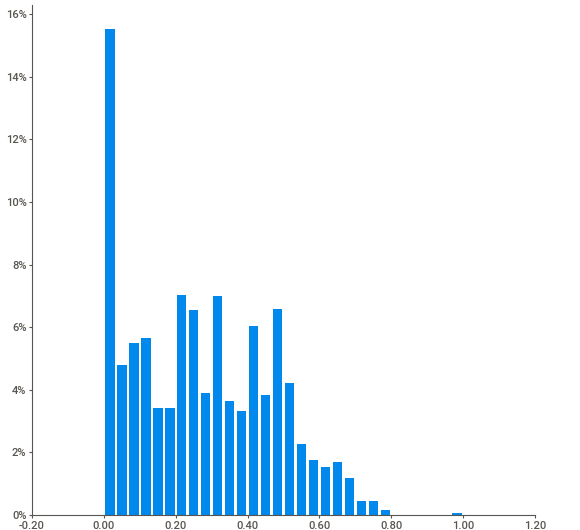
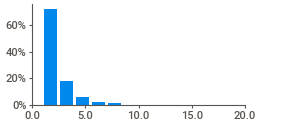
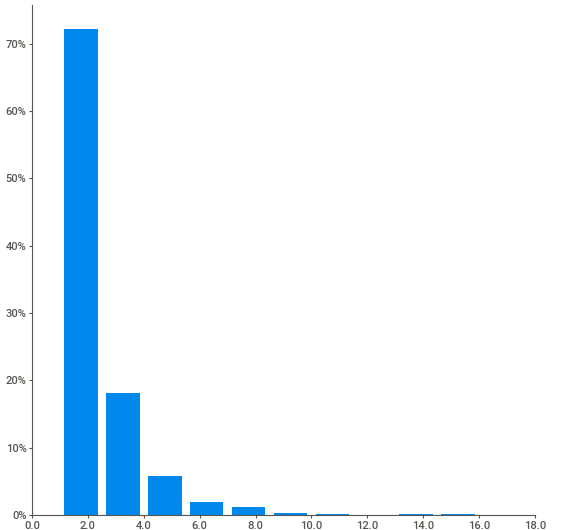
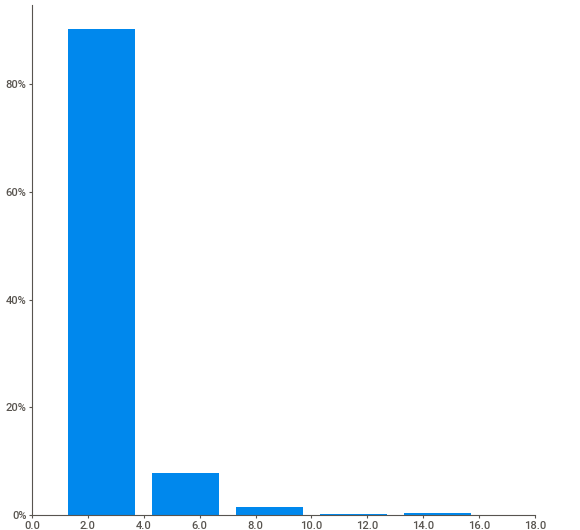
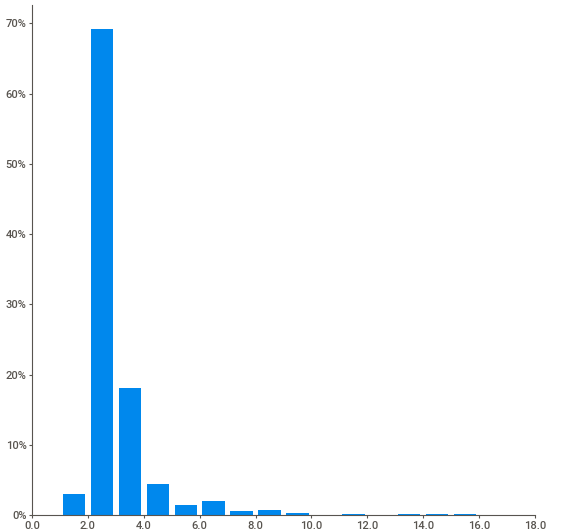
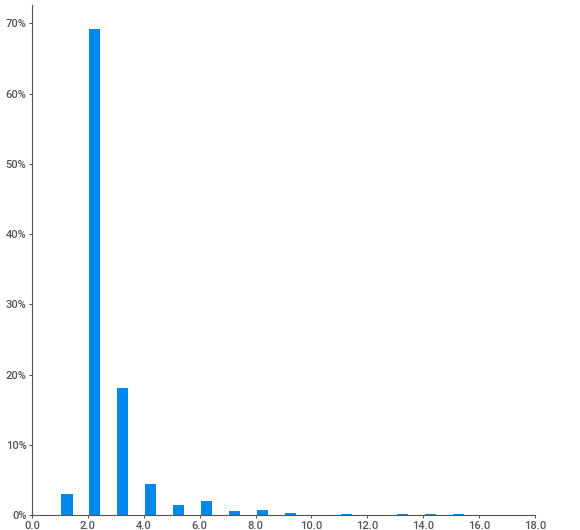
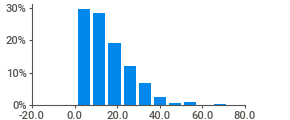
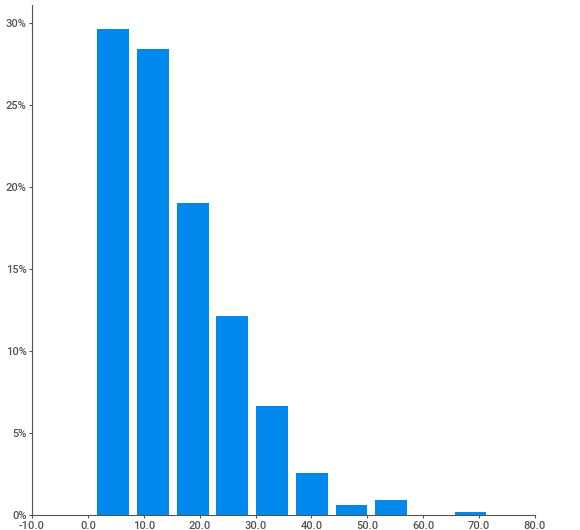
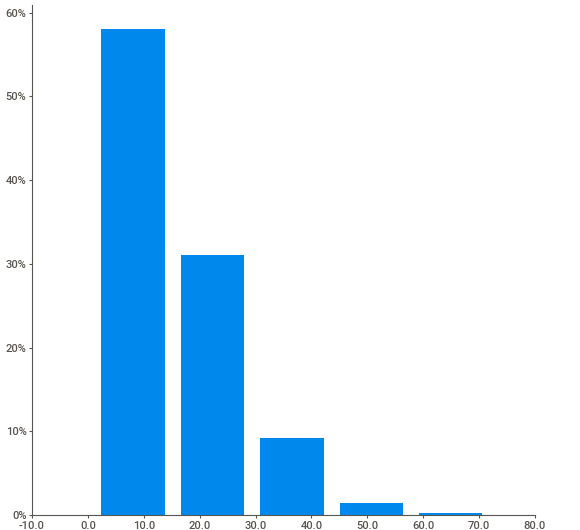
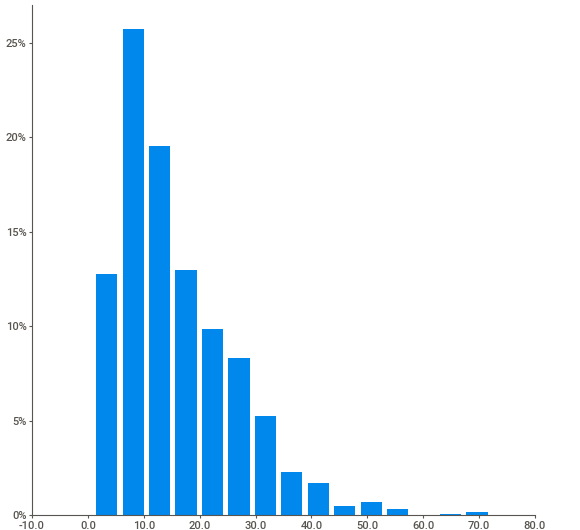
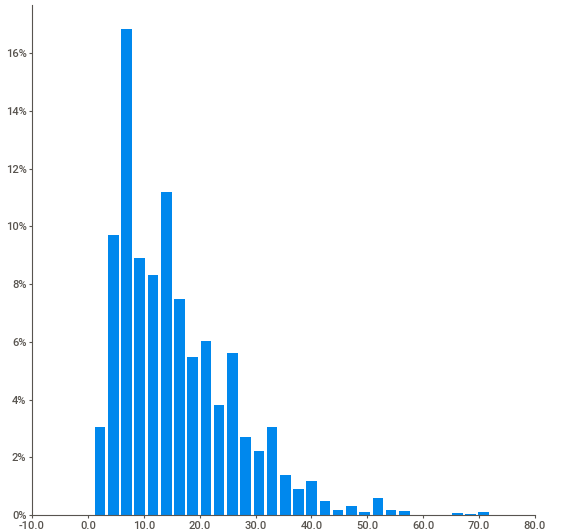
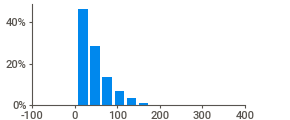
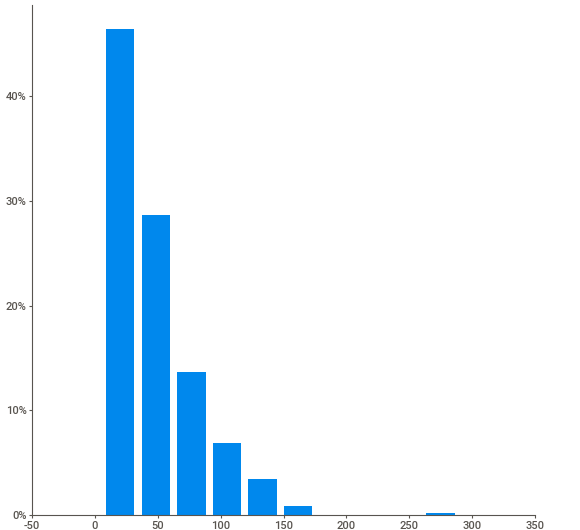
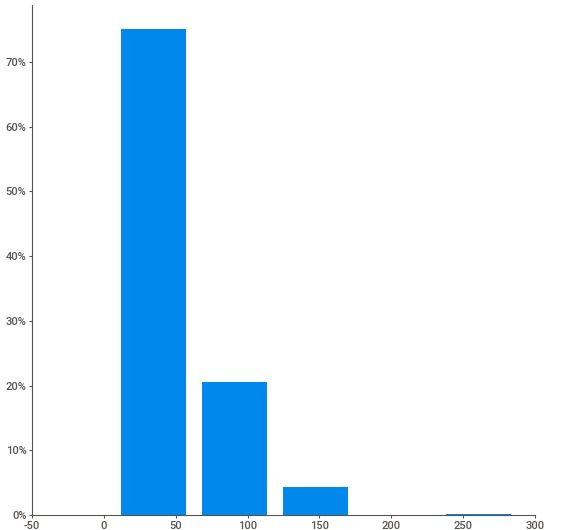
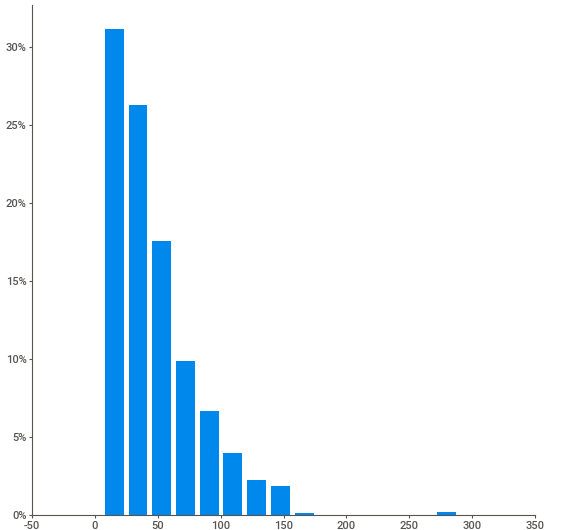
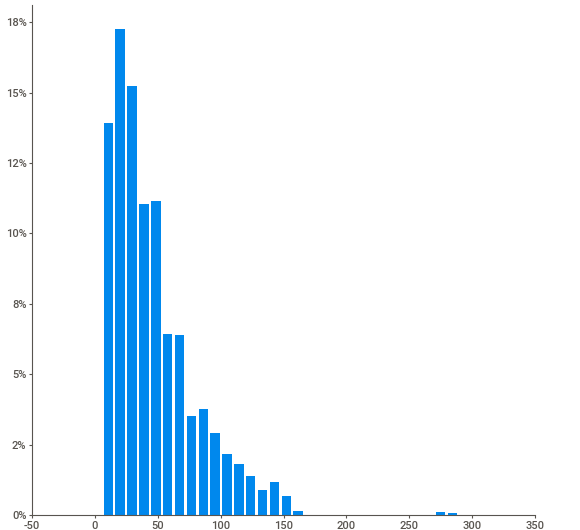
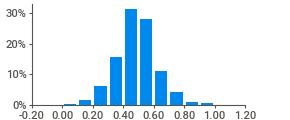
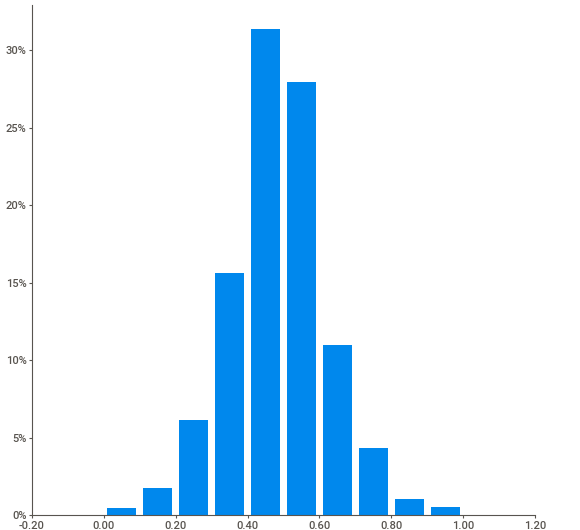
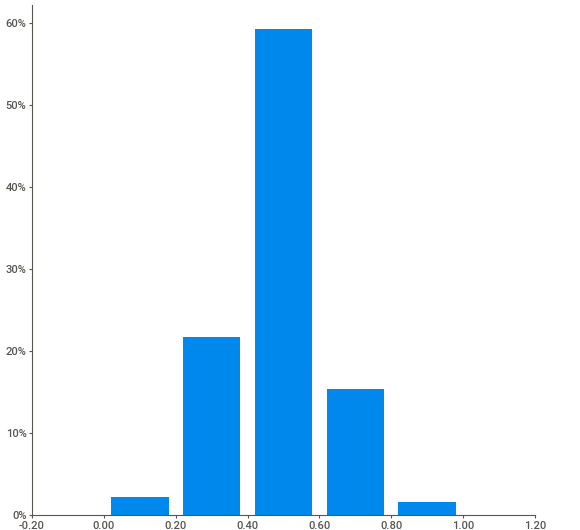
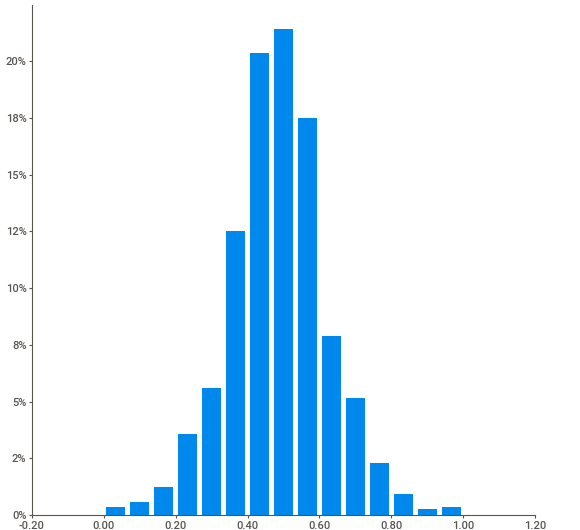
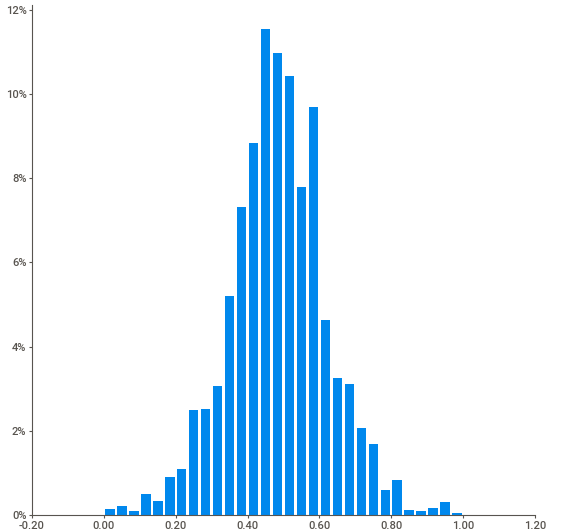
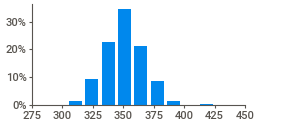
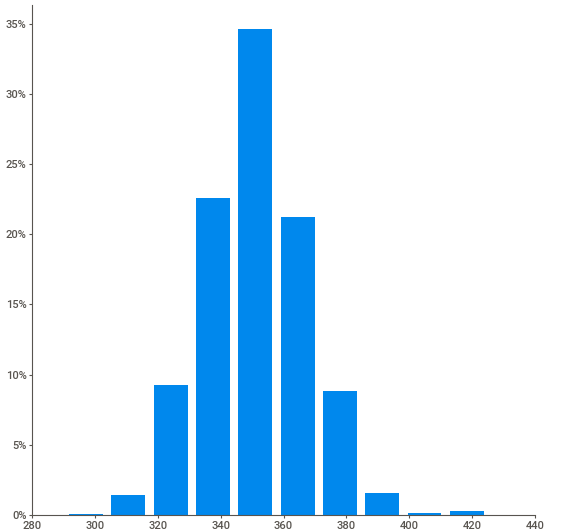
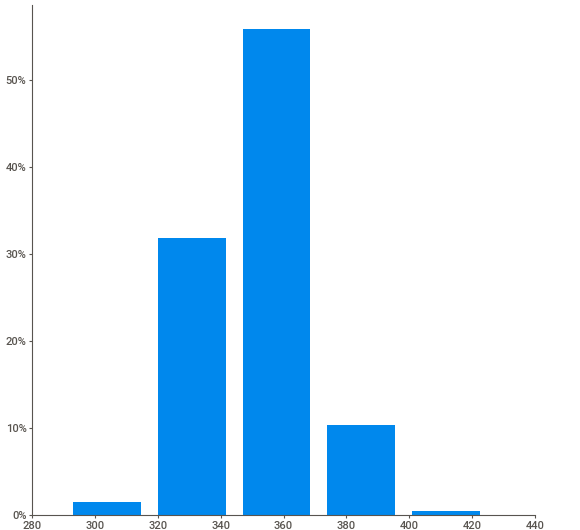
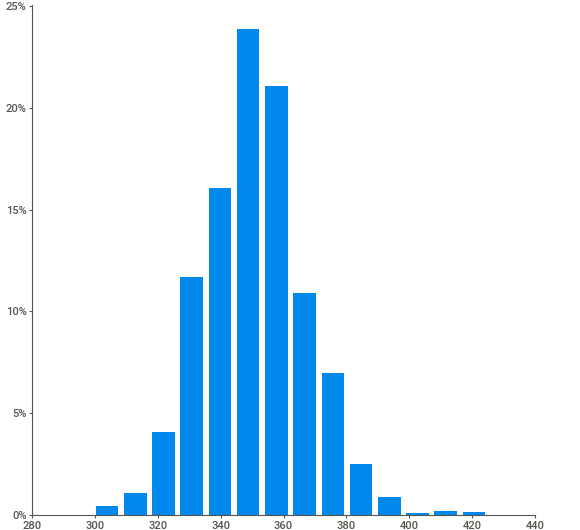
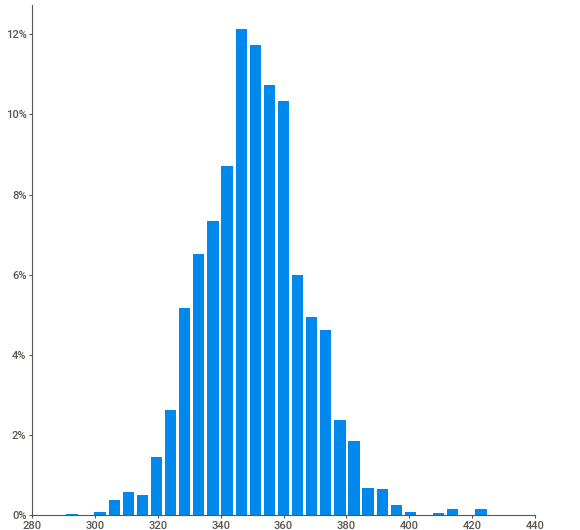
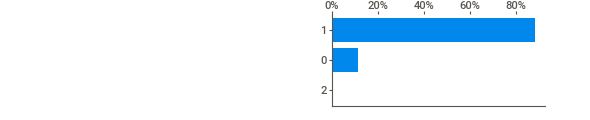
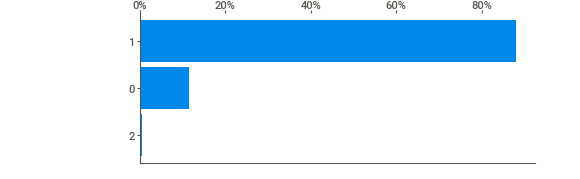
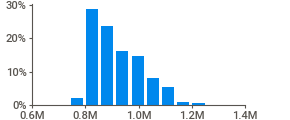
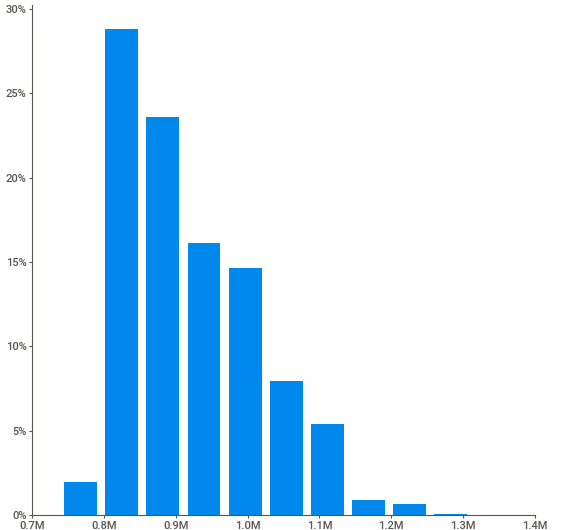
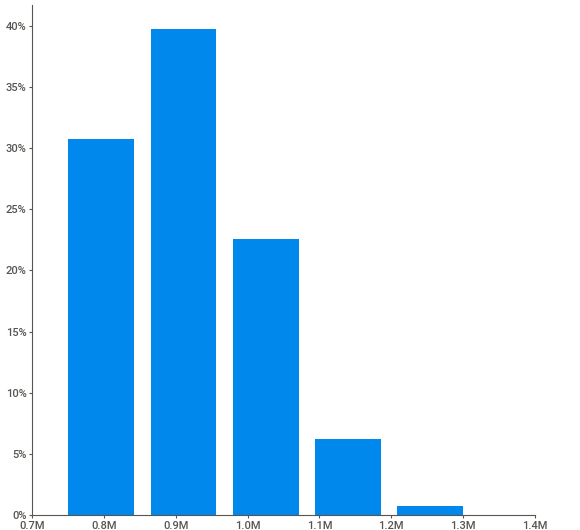
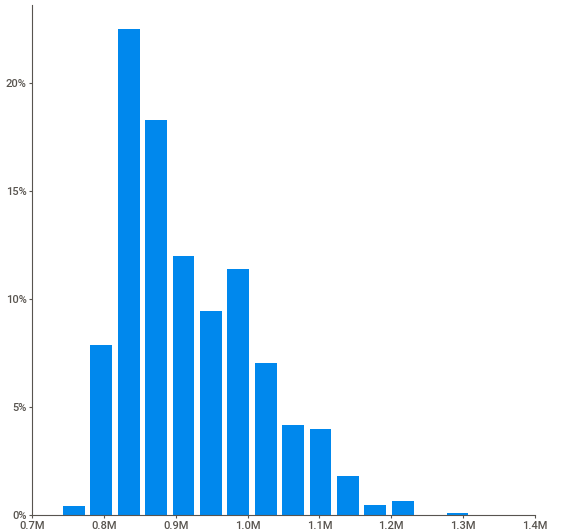
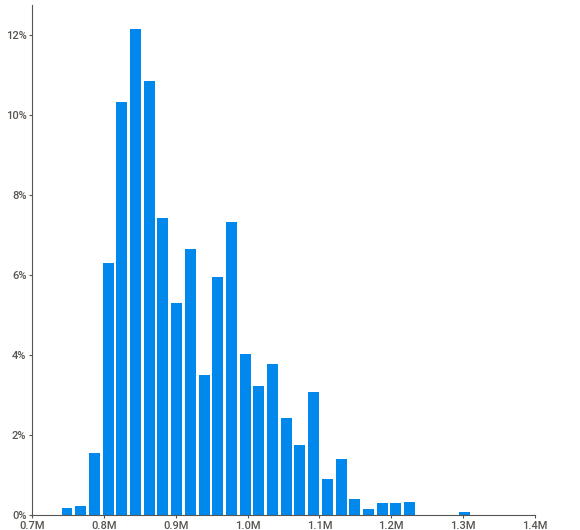
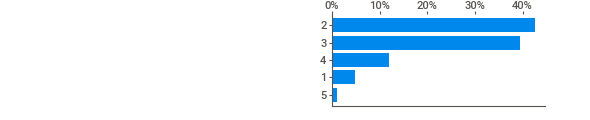
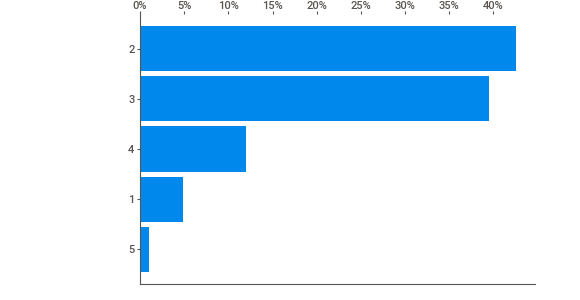
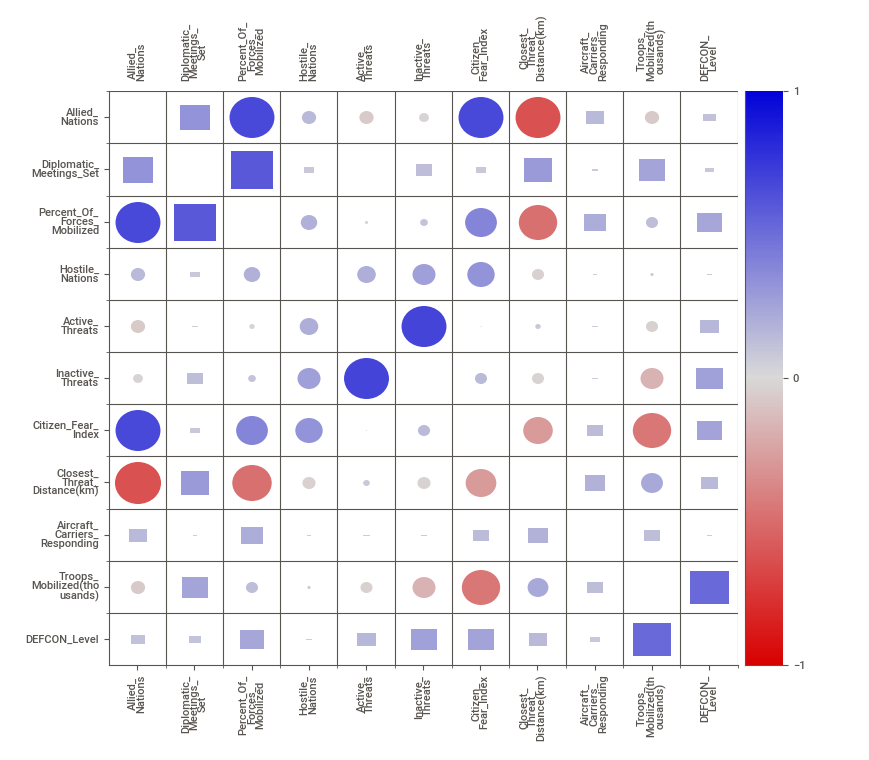
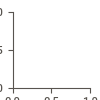

In [231]:
# profile = ProfileReport(df=train_df)
# profile.to_file(output_file='Pre_Profiling_Report.html')
# print('Accomplished!')
import sweetviz as sv
#feature_config = sv.FeatureConfig(force_num=['DEFCON_Level'])
#analyze_report = sv.analyze(train_df, 'DEFCON_Level',feature_config)
analyze_report = sv.analyze(train_df)
#analyze_report.show_html('train_df_sweetviz_report.html')
analyze_report.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


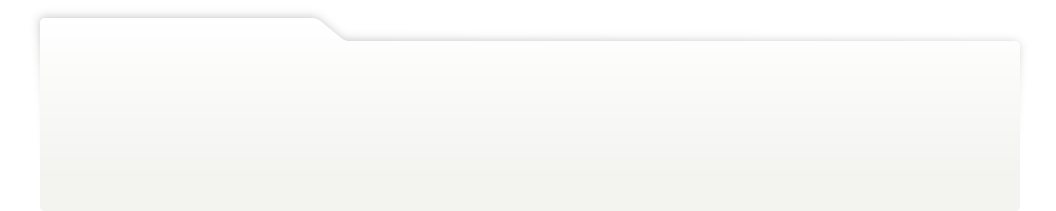
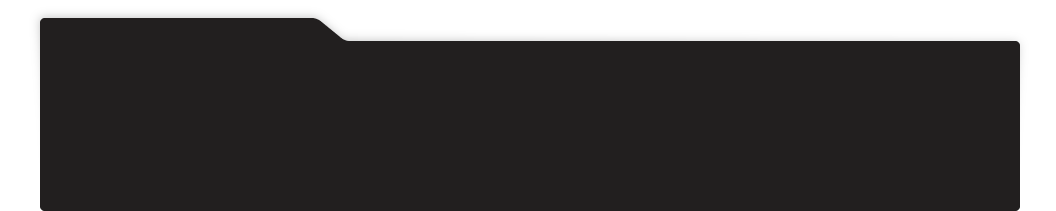
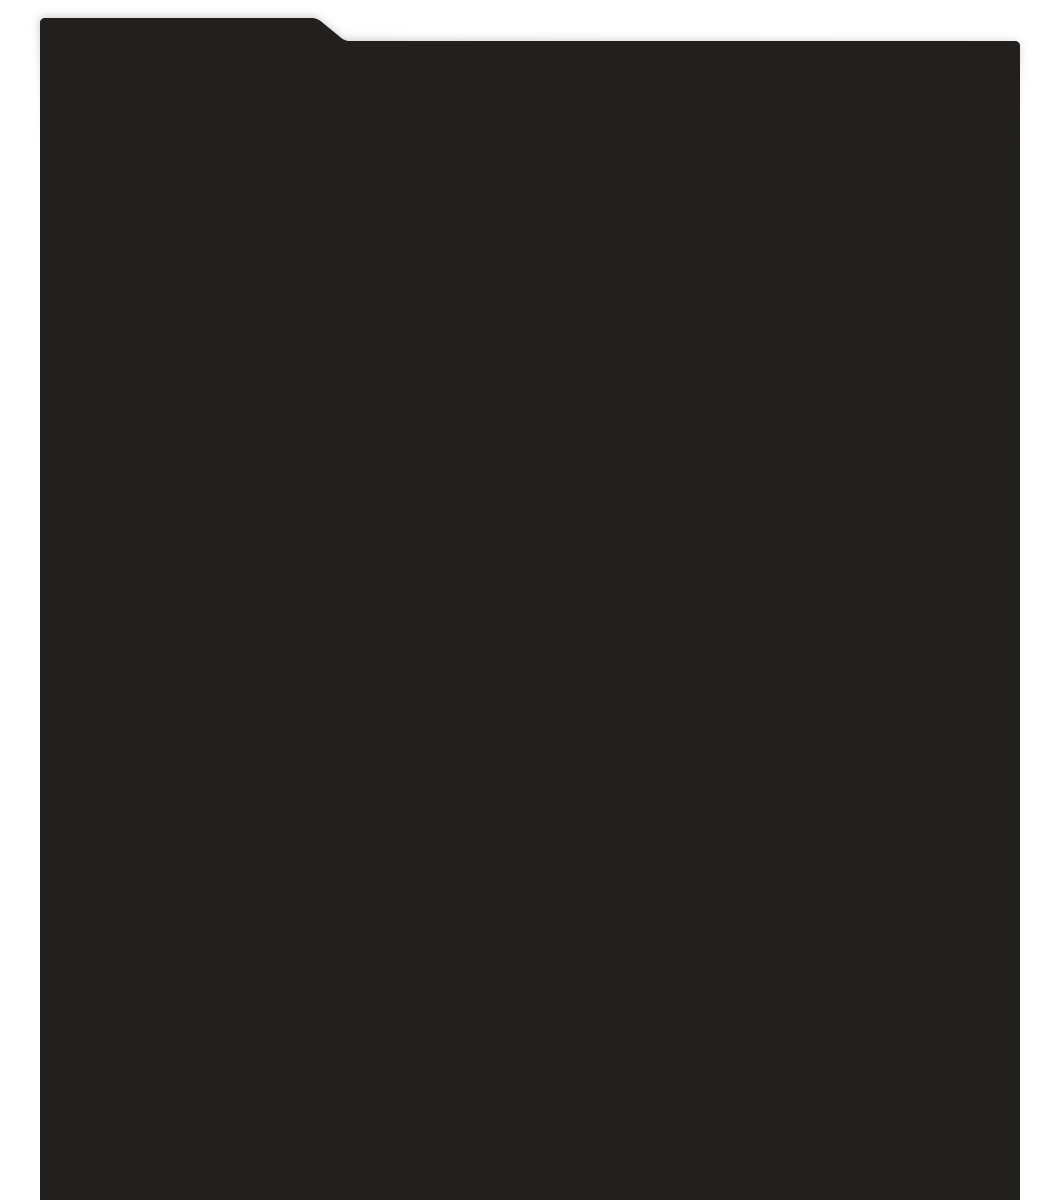
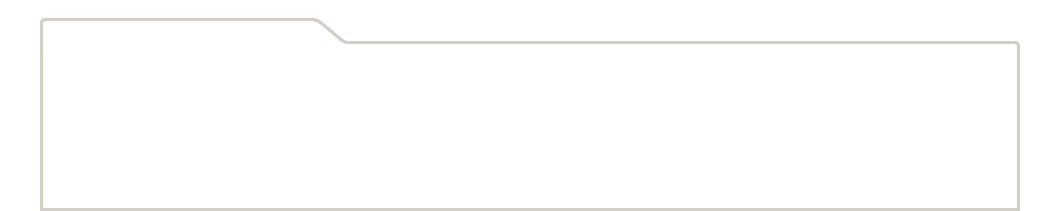
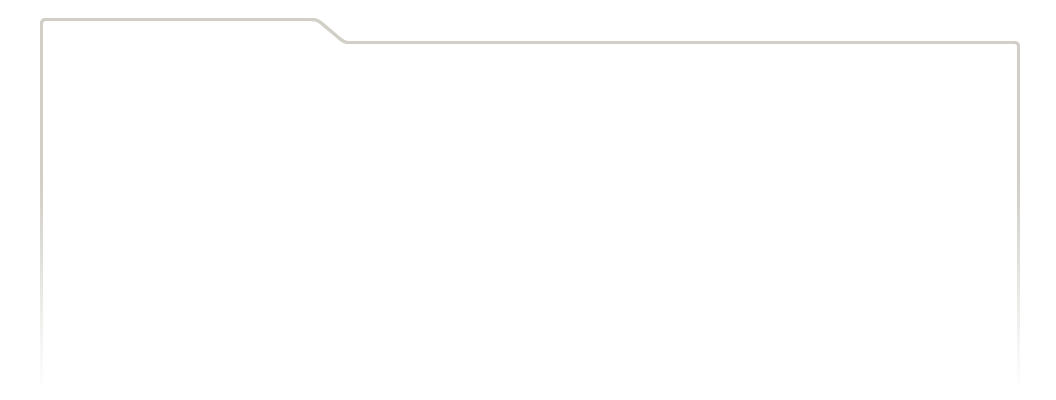
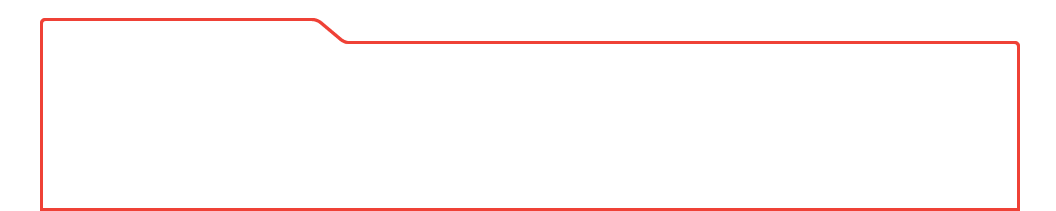
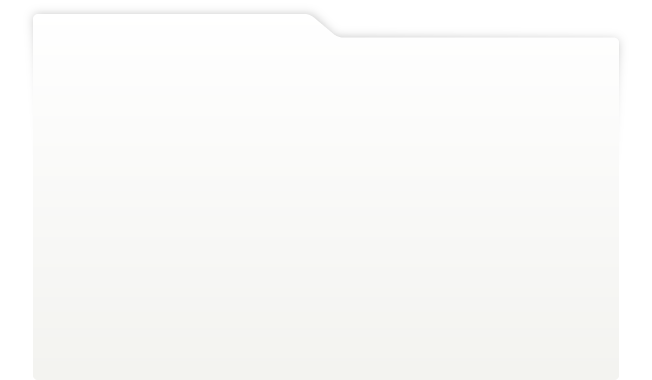
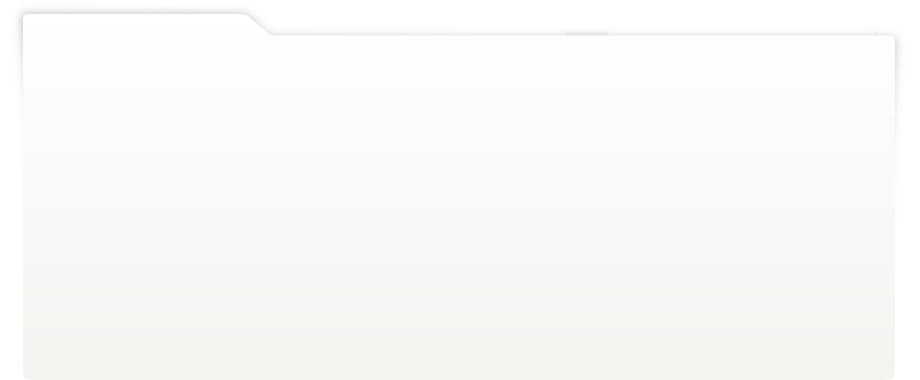
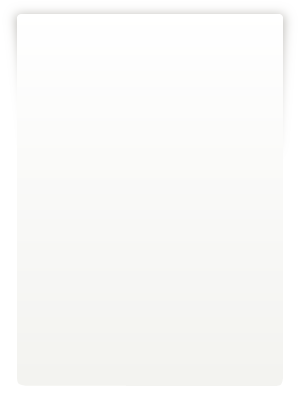
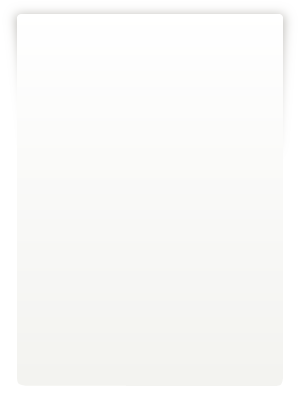
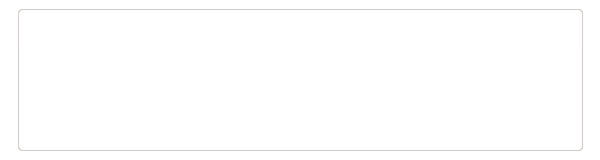
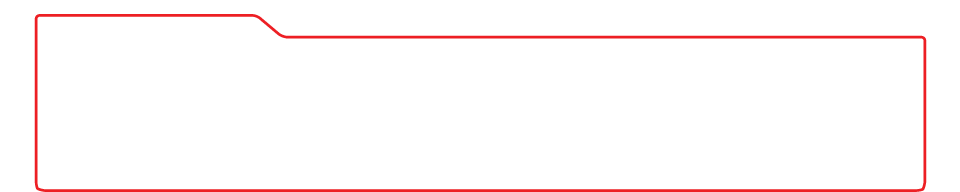
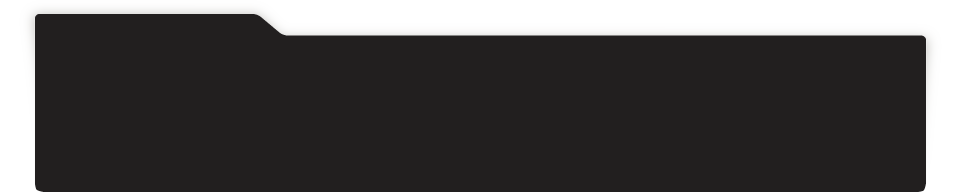
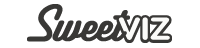
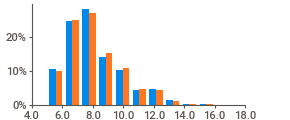
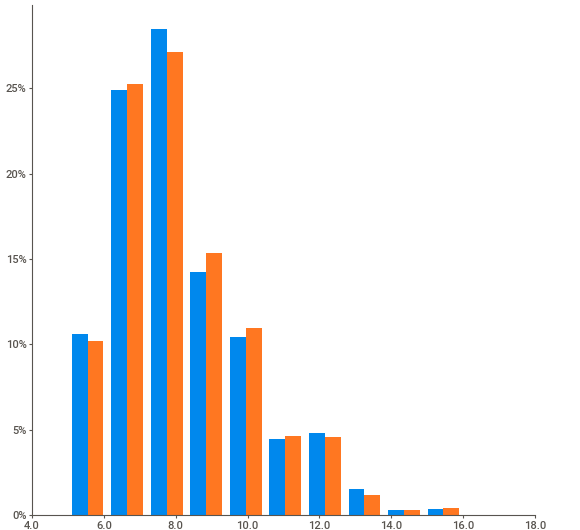
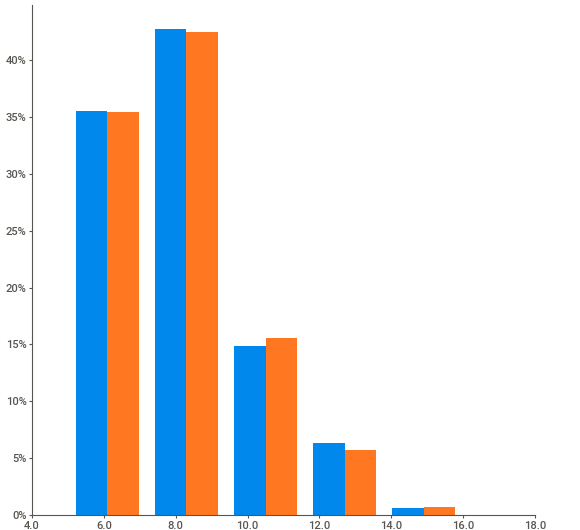
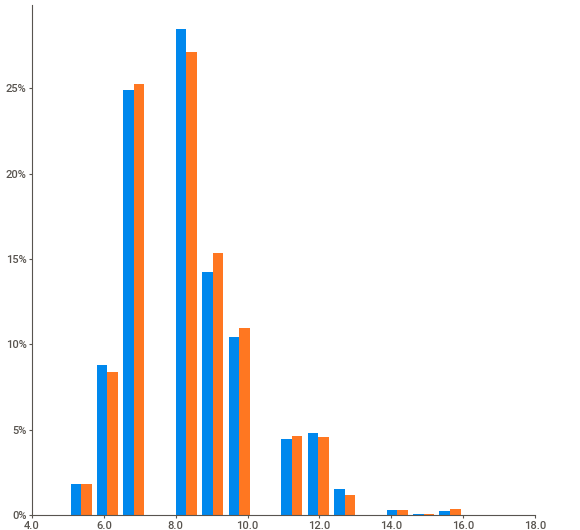
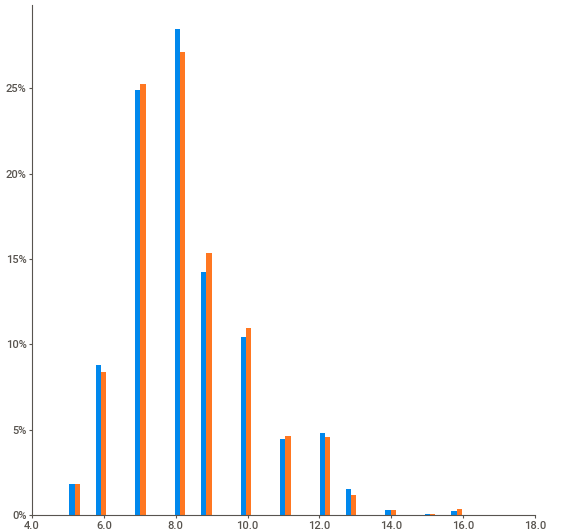
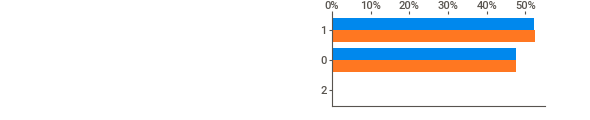
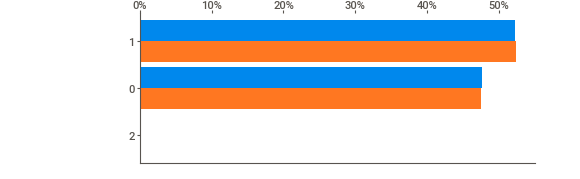
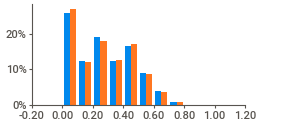
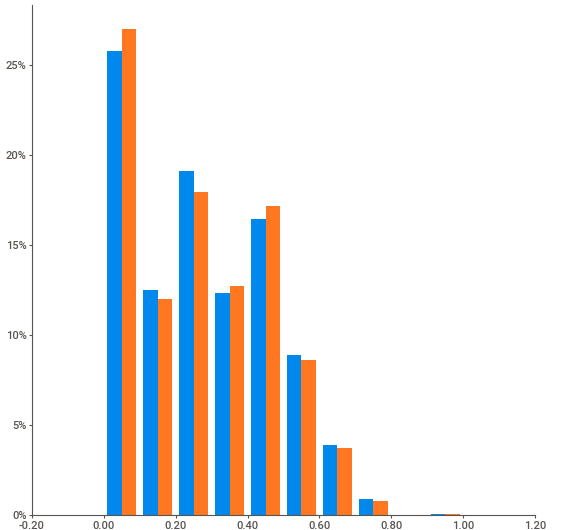
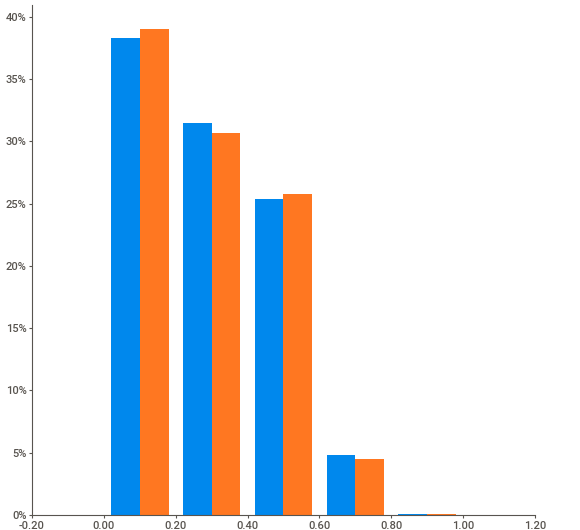
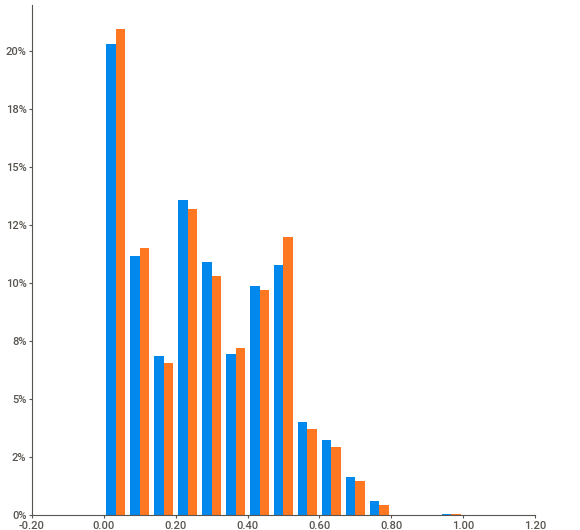
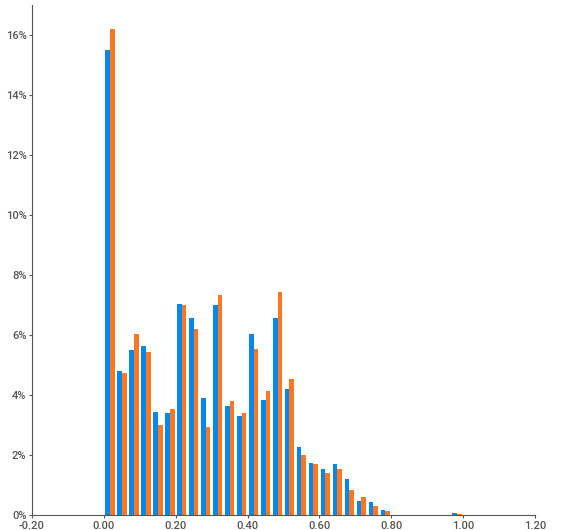
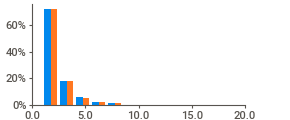
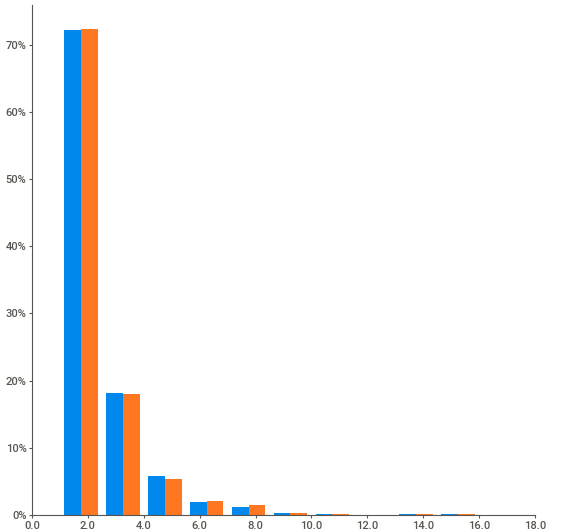
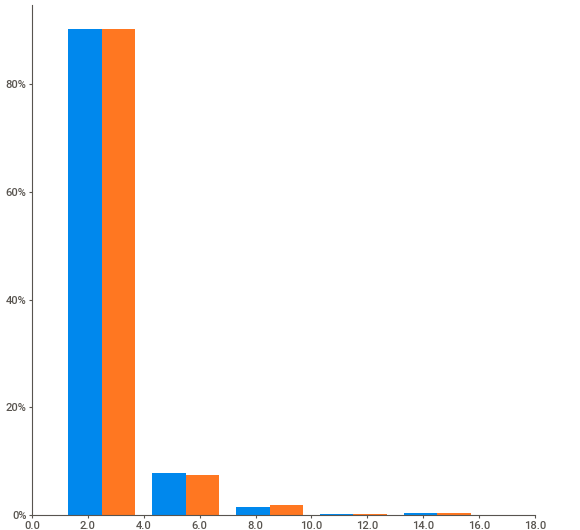
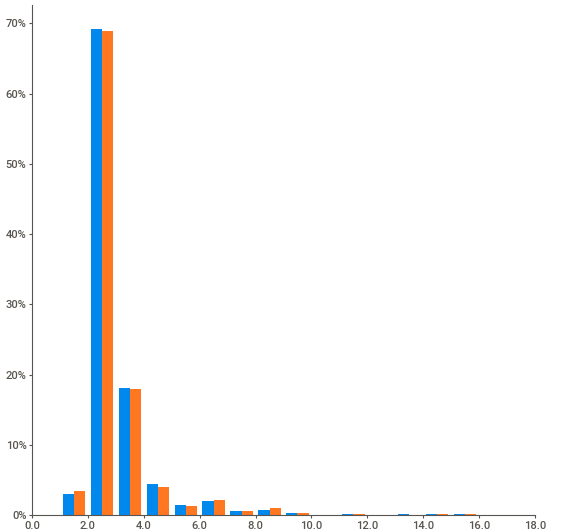
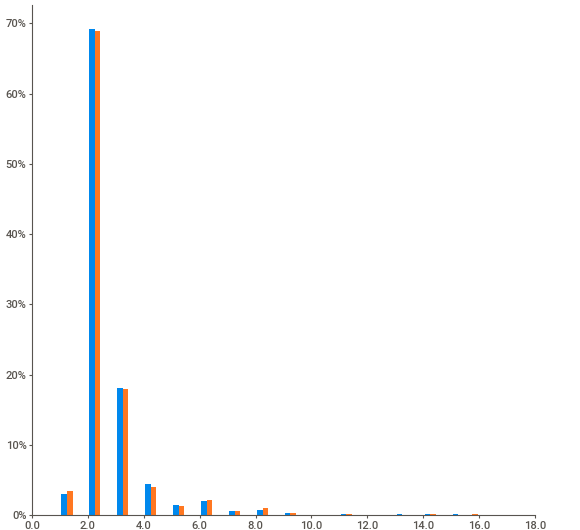
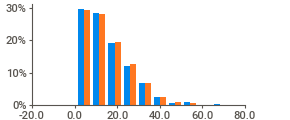
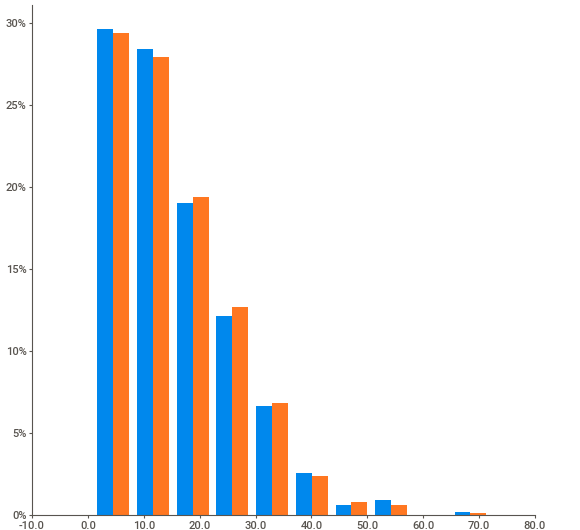
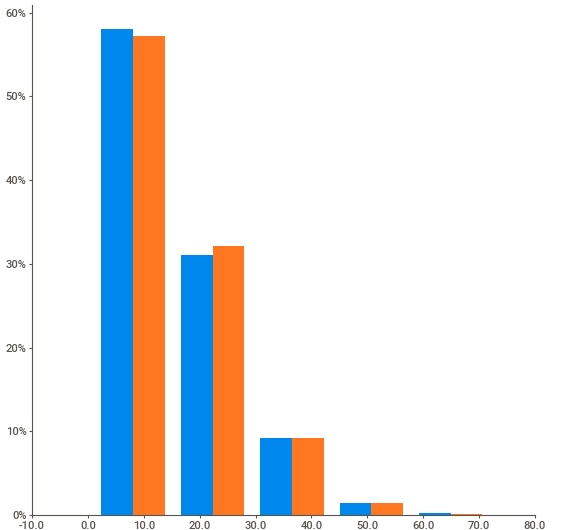
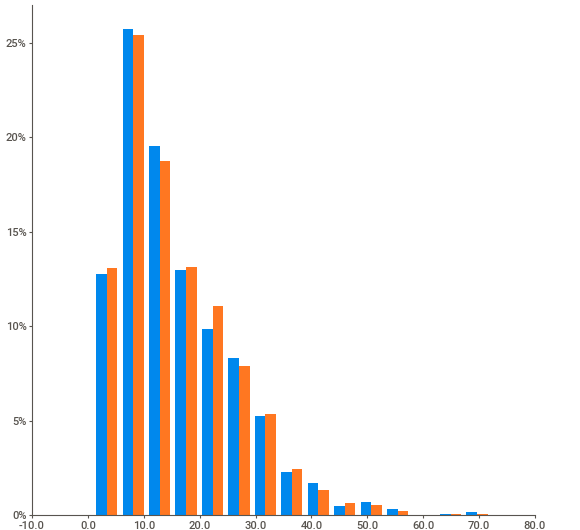
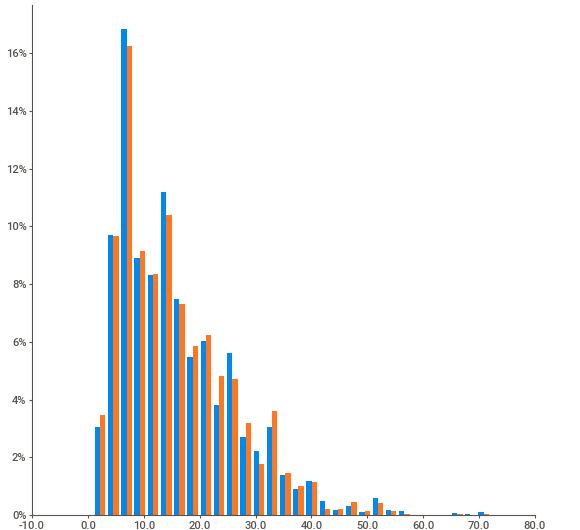
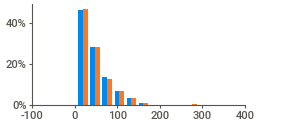
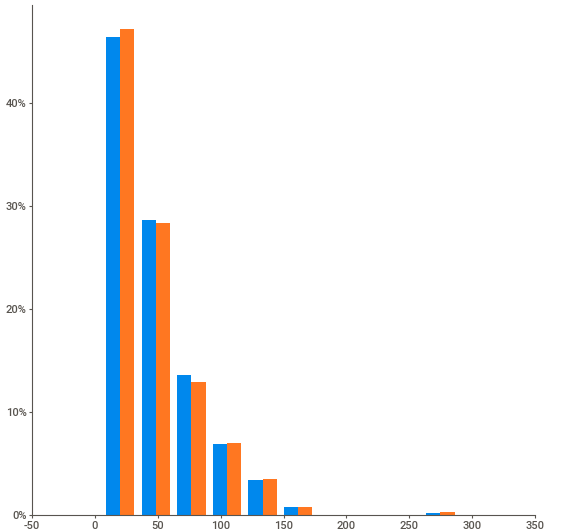
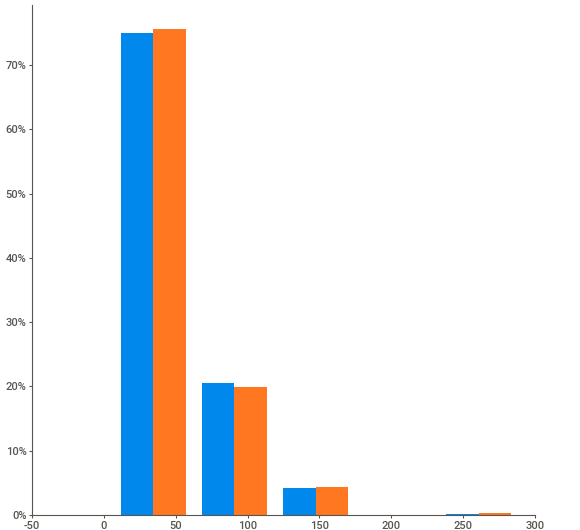
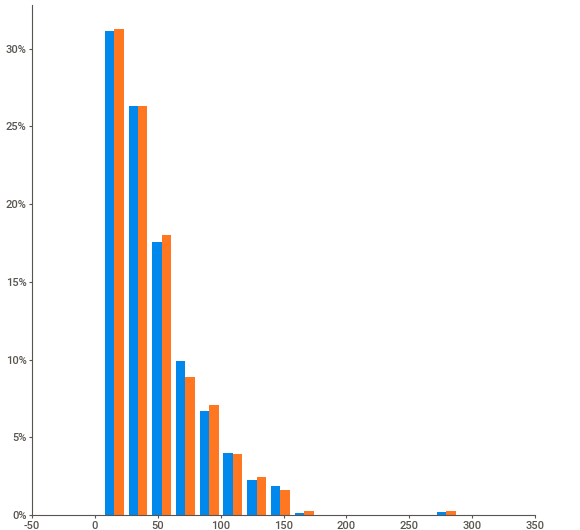
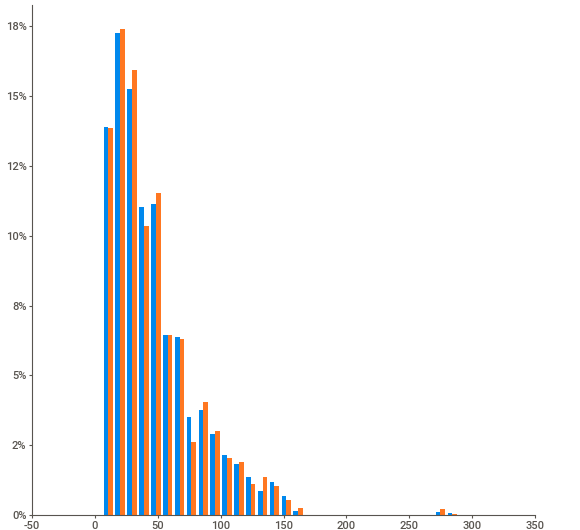
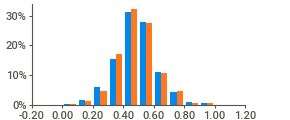
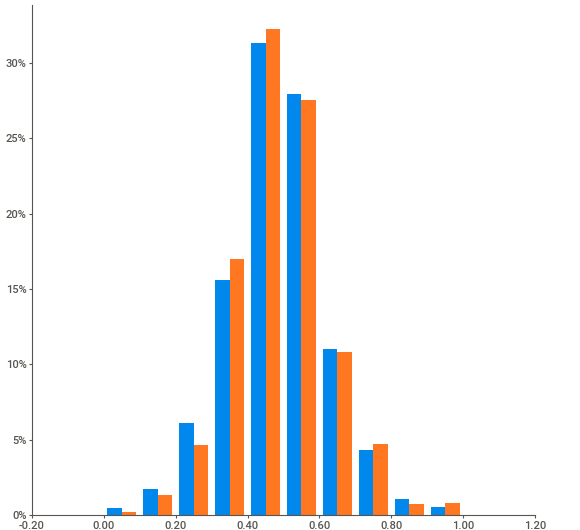
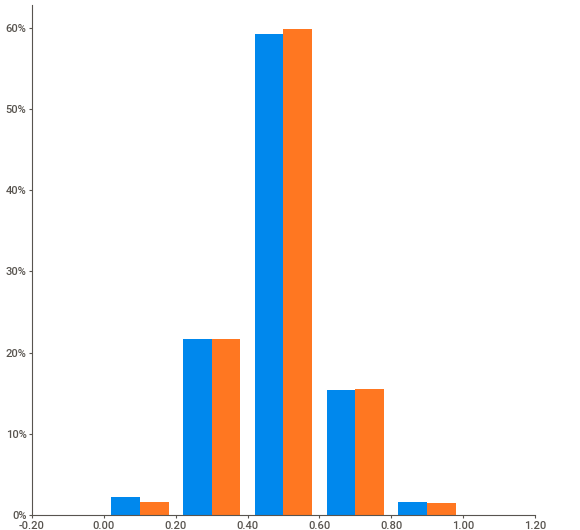
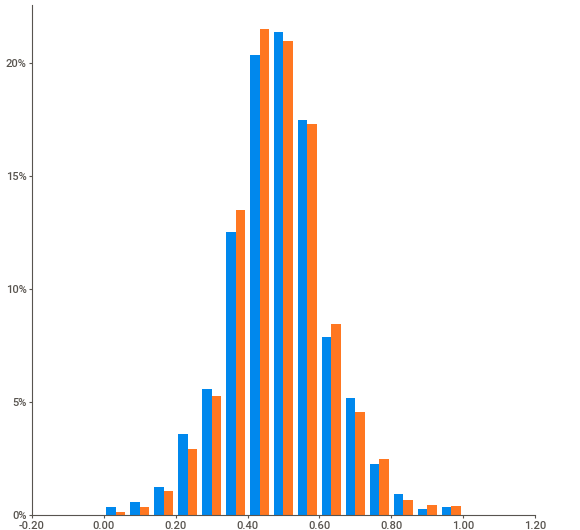
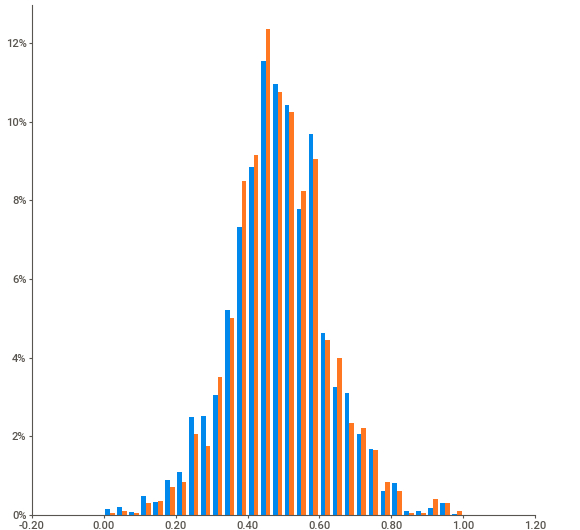
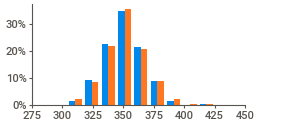
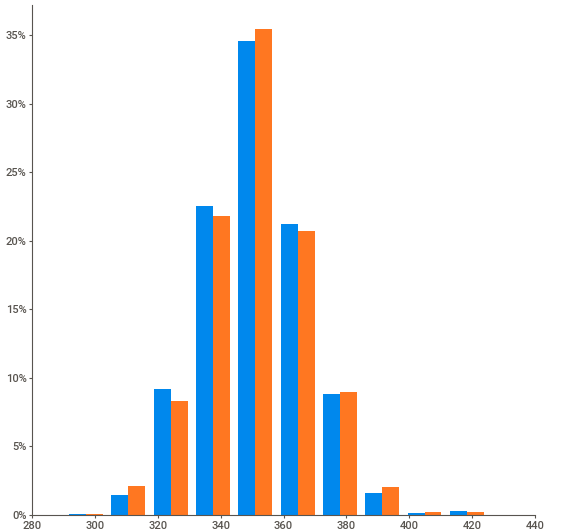
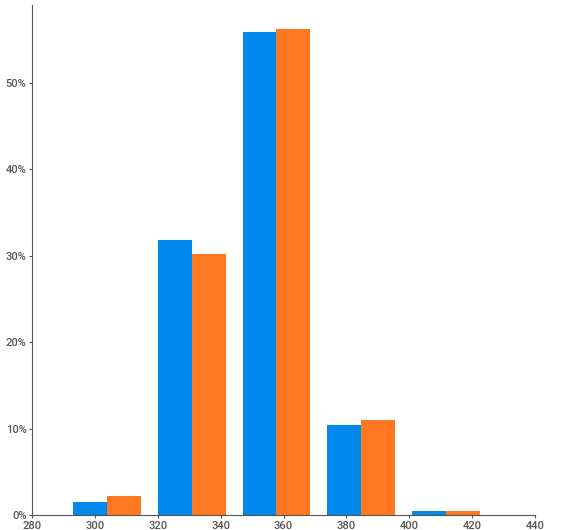
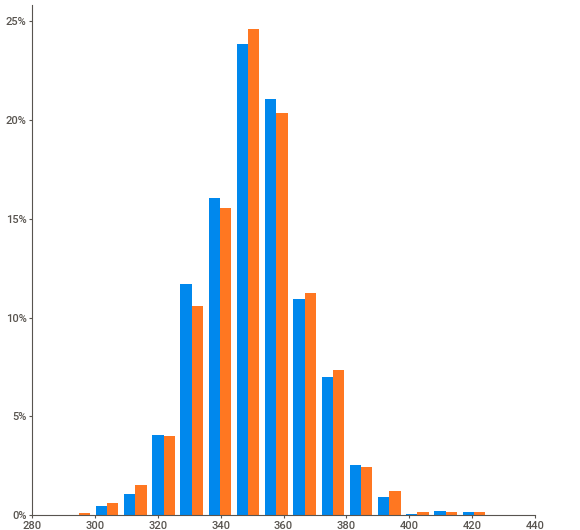
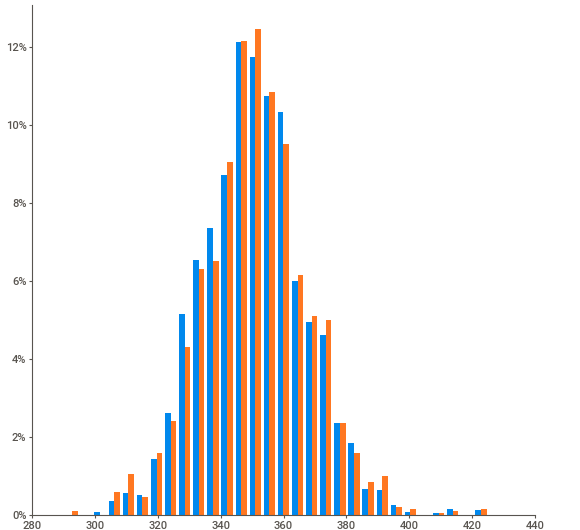
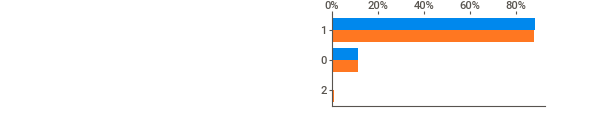
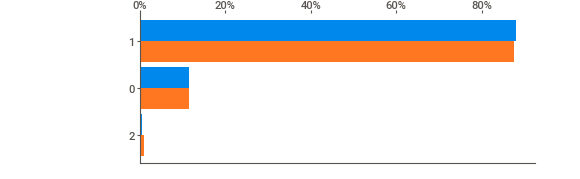
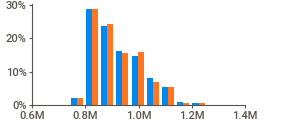
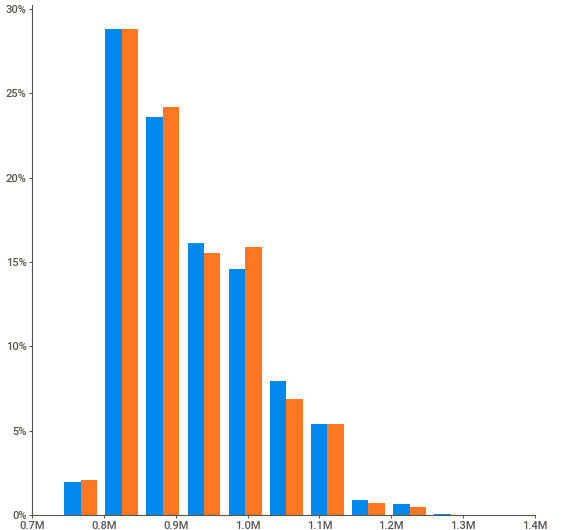
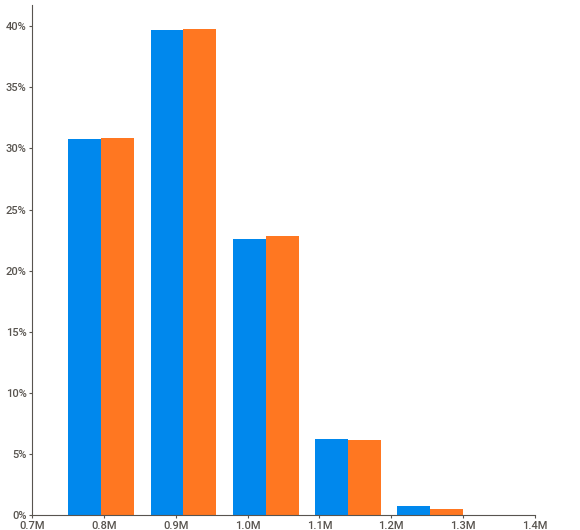
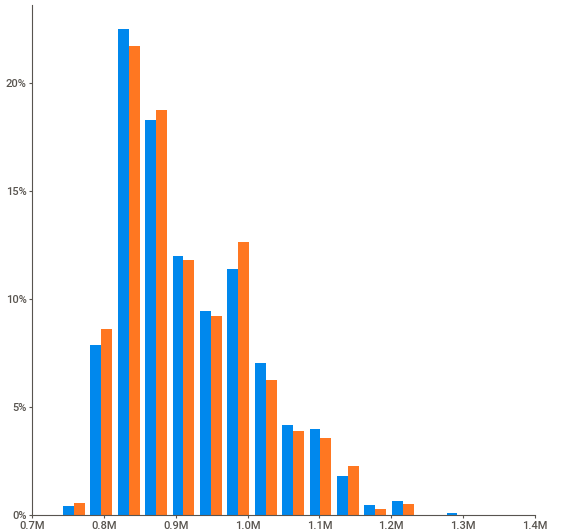
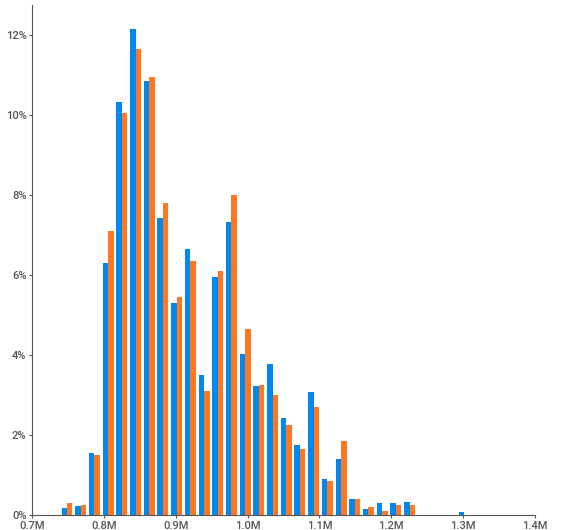
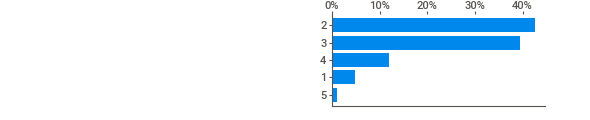
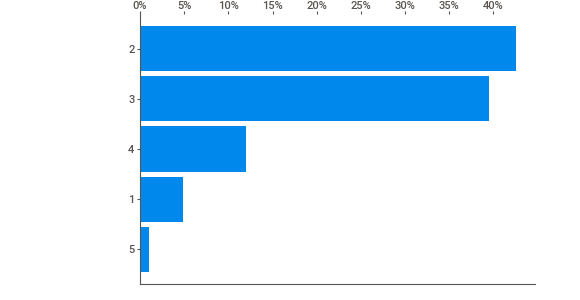
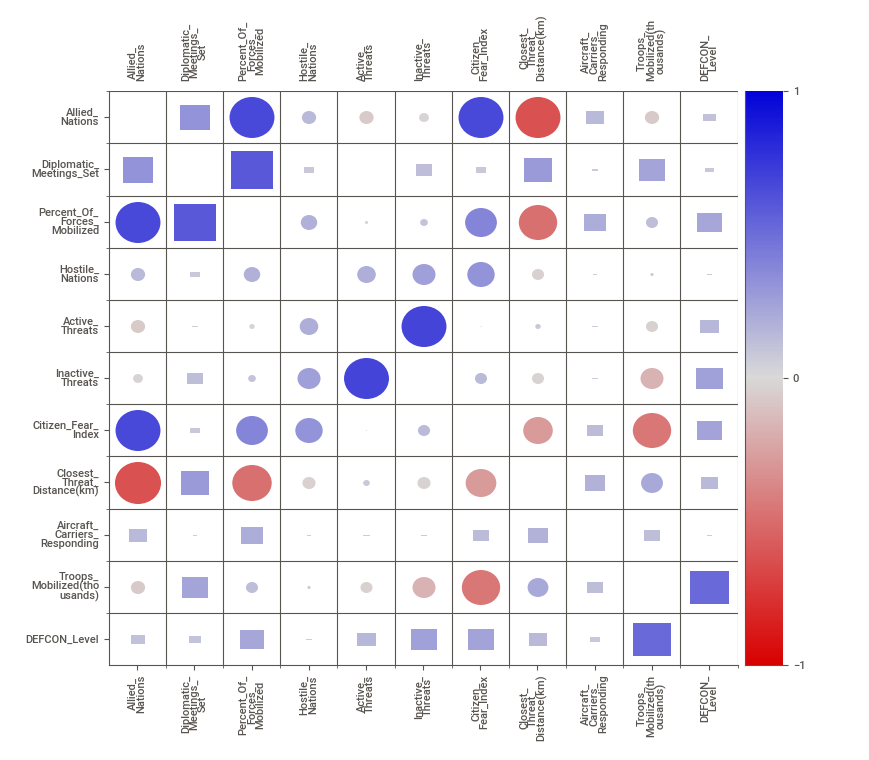
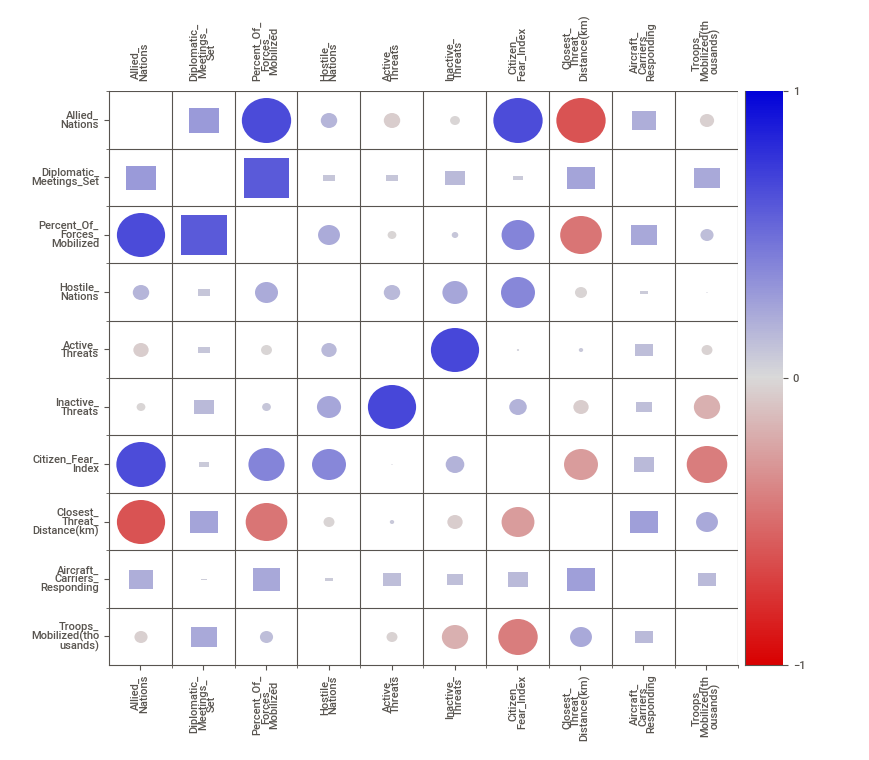

In [232]:
comparison_report = sv.compare([train_df, "Train"], [test_df, "Test"])
#comparison_report.show_html("Report.html") # Not providing a filename will default to SWEETVIZ_REPORT.html
comparison_report.show_notebook()

<a name = section32></a>
### **3.2 Data Pre-Processing**

- We need to pre process few features before EDA and Model Evaluation as needed

In [233]:
# display summary of dataset structure
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 1775 to 4105
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Allied_Nations                8000 non-null   int64  
 1   Diplomatic_Meetings_Set       8000 non-null   int64  
 2   Percent_Of_Forces_Mobilized   8000 non-null   float64
 3   Hostile_Nations               8000 non-null   int64  
 4   Active_Threats                8000 non-null   float64
 5   Inactive_Threats              8000 non-null   float64
 6   Citizen_Fear_Index            8000 non-null   float64
 7   Closest_Threat_Distance(km)   8000 non-null   float64
 8   Aircraft_Carriers_Responding  8000 non-null   int64  
 9   Troops_Mobilized(thousands)   8000 non-null   float64
 10  DEFCON_Level                  8000 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 750.0 KB


<a name = section33></a>
### **3.3 Data Post-Profiling**

- We can run the pandas profiling report to get latest information

In [234]:
# post_profile=ProfileReport(df=train_df)
# post_profile.to_file(output_file='Post Profiling Report.html')
# print('Accomplished!')

**Observations:**

- Not Applicable

<a name = section4></a>

---
# **4. Exploratory Data Analysis**
---

**NOTE**:  

- Exploratory Data Analysis will explore all the features and their relationship with other features
- Both non-graphical and graphical method will be used as applicable to respective features
- Both univariate and bivariate method be used as applicable to respective features

What is the correlation between numeric variables?

Text(0.5, 1.0, 'Correlation between Numerical features')

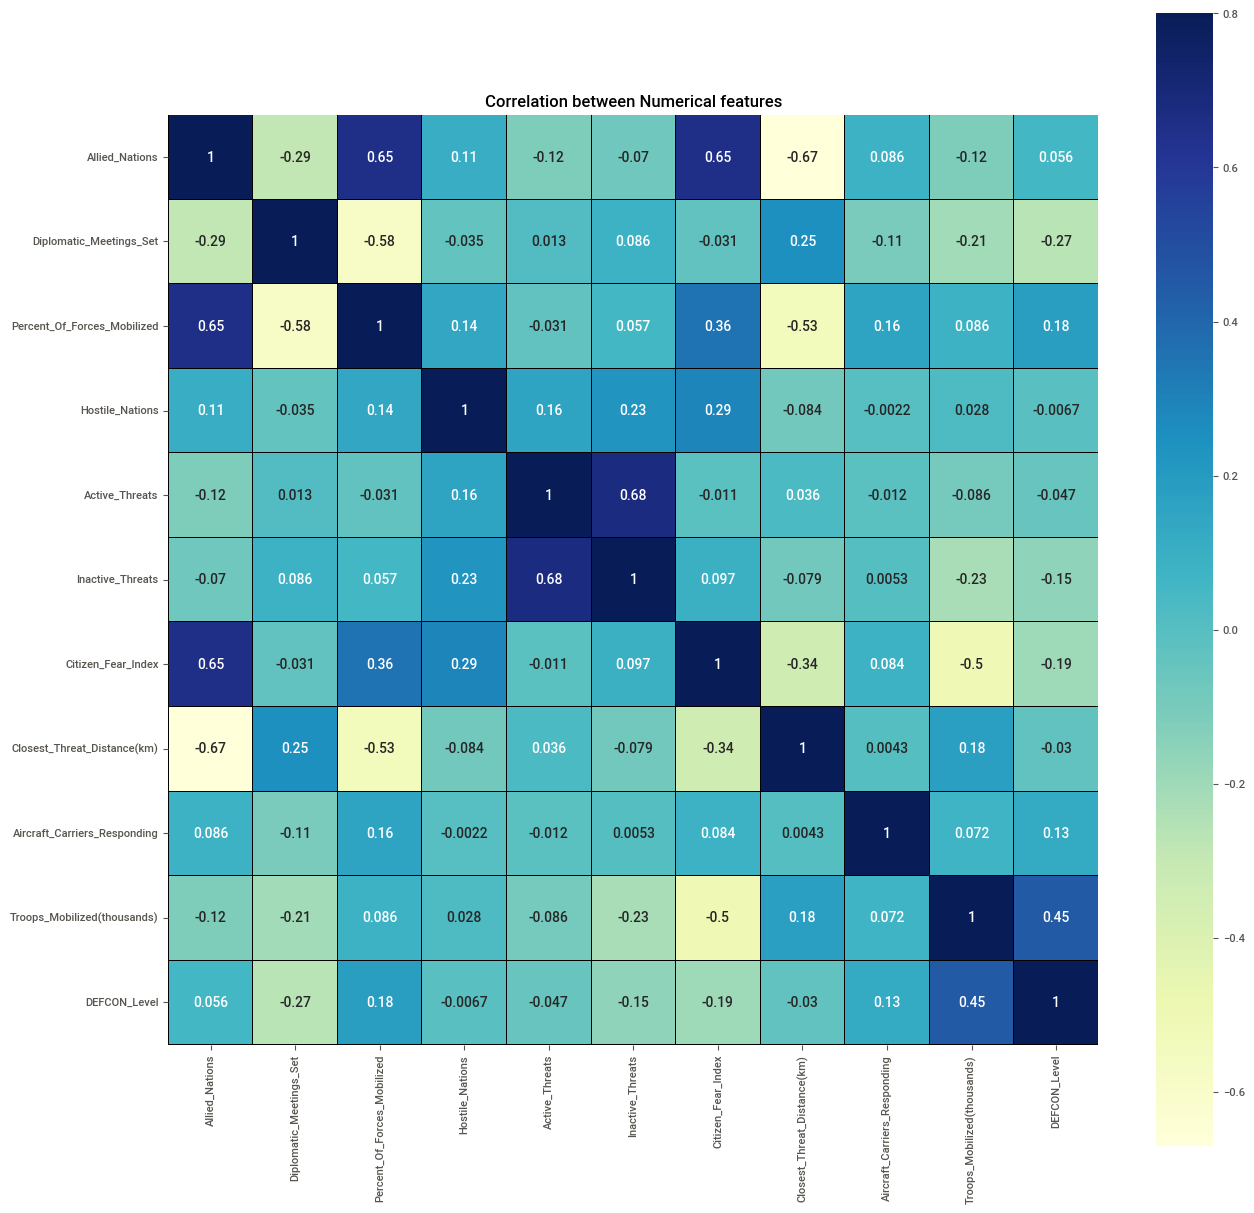

In [235]:
#Check corelation primarily between Numerical linear features and target variable
#Correlation is a measure used to represent how strongly two random variables are related to each other.
#Correlation ranges between -1 and +1
corr = train_df.corr(method='pearson')
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between Numerical features')

What is the relationship between numeric variables?

In [236]:
# plot pairwise relationship in a dataset
# plt.figure(figsize=(50,25))
# sns.pairplot(data=train_df,palette='rainbow',hue='DEFCON_Level',diag_kind='kde')
# plt.show()

In [237]:
#Covariance is a measure to indicate the extent to which two random variables change in tandem.
#Covariance can vary between -∞ and +∞
train_df.cov()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level
Allied_Nations,3.063658,-0.250341,0.224299,0.248728,-2.116602,-4.136201,0.154344,-18.999788,0.049452,-1.891962e+04,0.077944
Diplomatic_Meetings_Set,-0.250341,0.250455,-0.056935,-0.022550,0.069565,1.453655,-0.002134,2.037142,-0.017493,-9.657106e+03,-0.107131
Percent_Of_Forces_Mobilized,0.224299,-0.056935,0.038598,0.036631,-0.063791,0.377818,0.009485,-1.699129,0.010353,1.569231e+03,0.028630
Hostile_Nations,0.248728,-0.022550,0.036631,1.680710,2.123024,9.925134,0.050763,-1.769170,-0.000944,3.402867e+03,-0.006928
Active_Threats,-2.116602,0.069565,-0.063791,2.123024,108.951969,239.885709,-0.015396,6.028590,-0.041970,-8.395641e+04,-0.393751
Inactive_Threats,-4.136201,1.453655,0.377818,9.925134,239.885709,1148.596690,0.445255,-43.484149,0.058272,-7.117011e+05,-4.181000
Citizen_Fear_Index,0.154344,-0.002134,0.009485,0.050763,-0.015396,0.445255,0.018342,-0.742526,0.003725,-6.314427e+03,-0.021075
Closest_Threat_Distance(km),-18.999788,2.037142,-1.699129,-1.769170,6.028590,-43.484149,-0.742526,262.361361,0.023030,2.673254e+05,-0.382394
Aircraft_Carriers_Responding,0.049452,-0.017493,0.010353,-0.000944,-0.041970,0.058272,0.003725,0.023030,0.106968,2.196450e+03,0.033081
Troops_Mobilized(thousands),-18919.619536,-9657.106138,1569.230501,3402.866869,-83956.405077,-711701.116869,-6314.426529,267325.401128,2196.450452,8.659236e+09,33153.131694


<a name = section5></a>

---
# **5. Data Post-Processing**
---


<a name = section51></a>
### **5.1 Data Encoding**

- In this section, we will encode our categorical features as necessary and drop any column as necessary

In [238]:
# extract target variable
y = train_df['DEFCON_Level']

In [239]:
# check for missing value
y.isna().sum()

0

In [240]:
#check shape of variable
y.shape

(8000,)

In [241]:
y.head()

Id
1775    2
910     2
4767    3
5019    5
9006    2
Name: DEFCON_Level, dtype: int64

In [242]:
y.value_counts()

2    3407
3    3157
4     958
1     393
5      85
Name: DEFCON_Level, dtype: int64

In [243]:
# drop target column 
X = train_df.drop(columns=['DEFCON_Level'],axis=1)

In [244]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 1775 to 4105
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Allied_Nations                8000 non-null   int64  
 1   Diplomatic_Meetings_Set       8000 non-null   int64  
 2   Percent_Of_Forces_Mobilized   8000 non-null   float64
 3   Hostile_Nations               8000 non-null   int64  
 4   Active_Threats                8000 non-null   float64
 5   Inactive_Threats              8000 non-null   float64
 6   Citizen_Fear_Index            8000 non-null   float64
 7   Closest_Threat_Distance(km)   8000 non-null   float64
 8   Aircraft_Carriers_Responding  8000 non-null   int64  
 9   Troops_Mobilized(thousands)   8000 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 687.5 KB


In [245]:
# check new dataset
X.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands)
Id,,,,,,,,,,
1775,9,1,0.30,6,19.0,56.0,0.919971,368.88,1,924000.0
910,8,0,0.26,2,4.0,11.0,0.450073,359.34,1,924000.0
4767,9,0,0.57,2,18.0,44.0,0.452276,364.64,1,1020800.0
5019,10,0,0.46,2,5.0,12.0,0.541850,322.24,1,897600.0
9006,12,1,0.50,1,10.0,17.0,0.685022,340.26,1,950400.0


In [246]:
X_test = test_df

In [247]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 11997 to 897
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Allied_Nations                2000 non-null   int64  
 1   Diplomatic_Meetings_Set       2000 non-null   int64  
 2   Percent_Of_Forces_Mobilized   2000 non-null   float64
 3   Hostile_Nations               2000 non-null   int64  
 4   Active_Threats                2000 non-null   float64
 5   Inactive_Threats              2000 non-null   float64
 6   Citizen_Fear_Index            2000 non-null   float64
 7   Closest_Threat_Distance(km)   2000 non-null   float64
 8   Aircraft_Carriers_Responding  2000 non-null   int64  
 9   Troops_Mobilized(thousands)   2000 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 171.9 KB


In [248]:
# check new dataset
X_test.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands)
Id,,,,,,,,,,
11997,13,1,0.63,4,6.0,14.0,0.552863,316.94,1,1056000.0
6283,10,0,0.64,3,6.0,20.0,0.508811,349.80,1,1029600.0
9211,8,0,0.40,5,3.0,9.0,0.503671,358.28,1,1126400.0
9827,8,1,0.00,4,27.0,67.0,0.535242,336.02,1,827200.0
7564,8,1,0.22,2,20.0,38.0,0.470631,347.68,1,959200.0


<a name = section52></a>
### **5.2 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development.

In [249]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

<a name = section53></a>
### **5.3 Data Scaling**

- Using StandardScaler

In [250]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [251]:
X_test_scaled = scaler.transform(X_test)

In [252]:
#normalizer.adapt(np.array(X_train))

In [253]:
#print(normalizer.mean.numpy())

In [254]:
X_train_scaled[:5]

array([[-0.16961717, -1.05395973,  1.6241328 , -0.37893017,  1.87050231,
         1.14014403, -2.39037694,  0.3152957 ,  0.33211487,  0.98671435],
       [-0.74095921, -1.05395973, -0.30508068, -0.37893017,  0.80415392,
         0.25140451, -0.65155072,  0.57480667,  0.33211487, -0.32612087],
       [-1.31230124,  0.94406819, -1.37122497, -0.37893017, -0.84383904,
        -0.81508292, -1.42733473,  1.6777283 ,  0.33211487, -0.6074427 ],
       [-0.74095921,  0.94406819, -0.91430599, -0.37893017, -0.55301676,
        -0.81508292, -0.03627375,  0.83431764, -2.74391285,  0.42407068],
       [-1.31230124, -1.05395973, -0.66046211, -0.37893017, -0.84383904,
        -0.37071316, -2.70069054,  1.35333959,  0.33211487,  2.92470918]])

In [255]:
y_train[:5]

Id
7461    3
4556    3
7750    2
1289    3
632     2
Name: DEFCON_Level, dtype: int64

<a name = section6></a>

---
# **6. Model Development & Evaluation**
---


<a name=section61></a>

### **6.1 Build the Model**

- Let's build our model.

- Here, we'll use a `Sequential` model with two densely connected hidden layers, and an output layer.

In [256]:
model = tf.keras.Sequential([layers.Dense(64, activation='relu', input_dim=10),
      layers.Dense(64, activation='relu'),
      layers.Dense(5, activation='softmax')
  ])

In [257]:
y_train[:10]

Id
7461    3
4556    3
7750    2
1289    3
632     2
2443    4
6202    4
8194    2
1542    4
6298    2
Name: DEFCON_Level, dtype: int64

In [258]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)

In [259]:
encoded_y_train[:100]

array([2, 2, 1, 2, 1, 3, 3, 1, 3, 1, 3, 2, 1, 1, 2, 1, 2, 3, 2, 1, 1, 3,
       2, 2, 1, 1, 3, 4, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 3, 2,
       3, 1, 3, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 2, 4, 1,
       2, 0, 1, 3, 2, 3, 1, 1, 4, 2, 2, 1, 2, 2, 2, 3, 3, 0, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 1, 2, 2, 3, 1, 2, 2])

In [260]:
encoded_y_valid = encoder.transform(y_valid)

In [261]:
y_train_transformed = tf.keras.utils.to_categorical(encoded_y_train,num_classes=5,dtype='int64')
y_valid_transformed = tf.keras.utils.to_categorical(encoded_y_valid,num_classes=5,dtype='int64')

In [262]:
y_train_transformed.shape

(6400, 5)

In [263]:
y_train_transformed

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [264]:
y_valid_transformed

array([[1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [265]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                                                                    tf.keras.metrics.Precision(name='precision'),
                                                                    tf.keras.metrics.Recall(name='recall')])

In [266]:
%%time
history = model.fit(X_train_scaled,y_train_transformed, verbose=1, epochs=100)

Epoch 1/100
200/200 [==============================] - 4s 10ms/step - loss: 1.0881 - accuracy: 0.8204 - precision: 0.6053 - recall: 0.2928
Epoch 2/100
200/200 [==============================] - 2s 8ms/step - loss: 1.0015 - accuracy: 0.8295 - precision: 0.6204 - recall: 0.3800
Epoch 3/100
200/200 [==============================] - 1s 6ms/step - loss: 0.9833 - accuracy: 0.8318 - precision: 0.6252 - recall: 0.3969
Epoch 4/100
200/200 [==============================] - 1s 6ms/step - loss: 0.9730 - accuracy: 0.8336 - precision: 0.6291 - recall: 0.4092
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.9634 - accuracy: 0.8349 - precision: 0.6311 - recall: 0.4202
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.9569 - accuracy: 0.8366 - precision: 0.6332 - recall: 0.4350
Epoch 7/100
200/200 [==============================] - 1s 5ms/step - loss: 0.9510 - accuracy: 0.8377 - precision: 0.6396 - recall: 0.4317
Epoch 8/100
200/200 [============

<a name=section62></a>

### **6.2 Inspect the Model**

- Using the `.summary` method to print a simple description of the model

In [267]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                704       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 5)                 325       
                                                                 
Total params: 5,189
Trainable params: 5,189
Non-trainable params: 0
_________________________________________________________________


In [268]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize']= (18,8)
rcParams['axes.spines.top']= False
rcParams['axes.spines.right']= False

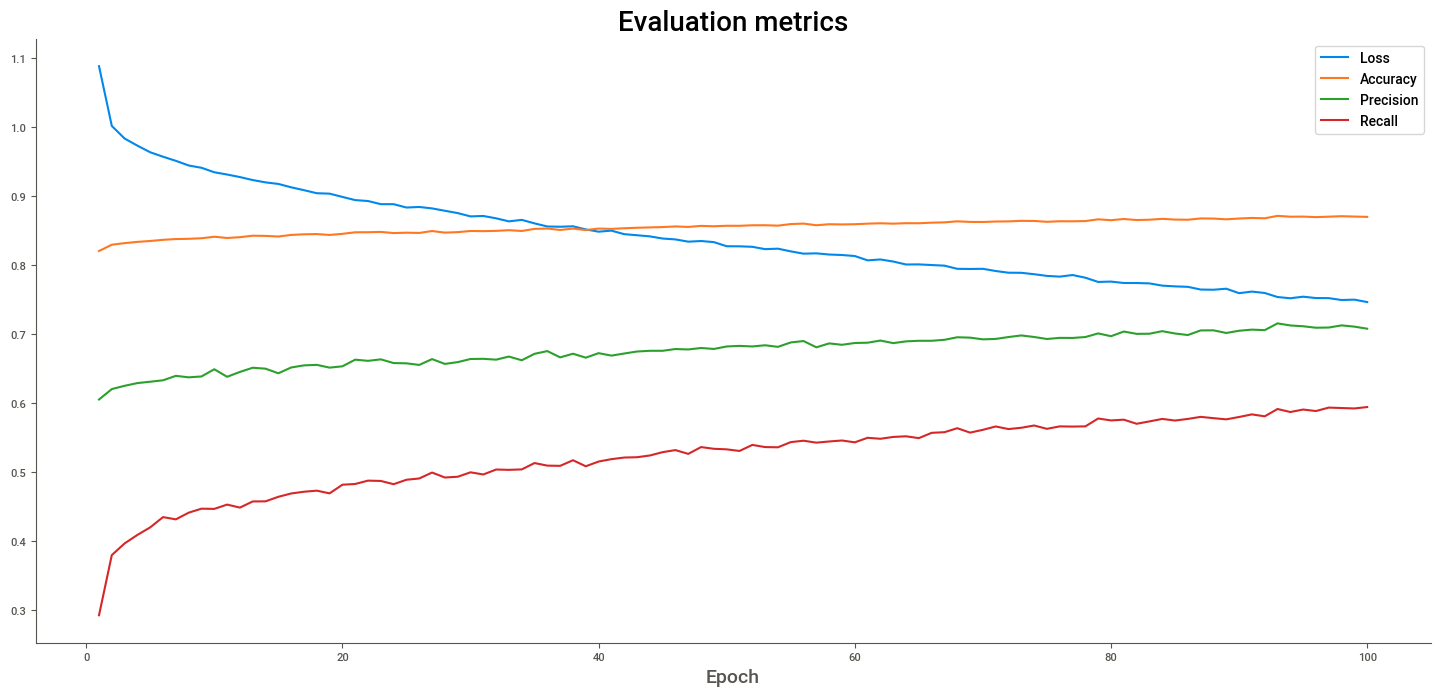

In [269]:
plt.plot(np.arange(1,101), history.history['loss'], label='Loss')
plt.plot(np.arange(1,101), history.history['accuracy'], label='Accuracy')
plt.plot(np.arange(1,101), history.history['precision'], label='Precision')
plt.plot(np.arange(1,101), history.history['recall'], label='Recall')
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()

In [270]:
eval_results = {}

In [271]:
eval_results['model'] = model.evaluate(X_valid_scaled, y_valid_transformed, verbose=0)

In [272]:
#eval_predictions = model.predict(X_valid_scaled).flatten()
eval_predictions = model.predict(X_valid_scaled)

In [273]:
eval_predictions[:5]

array([[4.4063166e-01, 5.4152286e-01, 1.7489390e-02, 3.5607113e-04,
        2.6101776e-15],
       [1.1249676e-02, 5.6313181e-01, 4.2560843e-01, 1.0103292e-05,
        1.8489739e-13],
       [3.8107049e-02, 6.7733848e-01, 2.2533143e-01, 5.9212908e-02,
        1.0144579e-05],
       [5.1037236e-03, 6.7582577e-01, 1.7984559e-01, 1.1645213e-01,
        2.2772809e-02],
       [3.4589495e-03, 5.3000164e-01, 4.6651971e-01, 1.9649277e-05,
        2.6643691e-13]], dtype=float32)

In [274]:
eval_final_prediction = eval_predictions

A prediction is an array of 5 numbers. They represent the model's "confidence" that the label corresponds to each of the 5 different classes. Lets see which label has the highest confidence value:

In [275]:
eval_final_prediction[10]

array([0.00220967, 0.06692312, 0.5786313 , 0.2903889 , 0.061847  ],
      dtype=float32)

In [276]:
np.argmax(eval_final_prediction[10])

2

In [277]:
y_valid_transformed[10]

array([0, 0, 1, 0, 0])

In [278]:
# prediction on test dataset
#y_test_pred = model.predict(X_test_scaled).flatten()
y_test_pred = model.predict(X_test_scaled)

In [279]:
y_test_pred

array([[8.78226885e-04, 9.45245773e-02, 7.90437043e-01, 1.09652720e-01,
        4.50734049e-03],
       [4.87034180e-04, 9.88570601e-02, 8.45885098e-01, 5.29054701e-02,
        1.86543376e-03],
       [4.55608487e-01, 3.31323072e-02, 4.00969148e-01, 1.09750986e-01,
        5.39117958e-04],
       ...,
       [4.21293080e-03, 9.79333699e-01, 1.64514836e-02, 1.93432265e-06,
        2.09618369e-12],
       [1.17993378e-03, 3.90926898e-02, 3.87108445e-01, 4.94018734e-01,
        7.86001980e-02],
       [1.05714343e-01, 4.72356439e-01, 3.93028080e-01, 1.32244499e-02,
        1.56766977e-02]], dtype=float32)

In [280]:
from numpy.ma.core import argmax
final_prediction={}
for i in range(len(y_test_pred)):
  if np.argmax(y_test_pred[i])==0:
    final_prediction[i]=1
  elif np.argmax(y_test_pred[i])==1:
    final_prediction[i]=2 
  elif np.argmax(y_test_pred[i])==2:
    final_prediction[i]=3
  elif np.argmax(y_test_pred[i])==3:
    final_prediction[i]=4
  elif np.argmax(y_test_pred[i])==4:
    final_prediction[i]=5


In [281]:
final_prediction[10]

2

In [282]:
final_prediction.values()

dict_values([3, 3, 1, 2, 3, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 3, 2, 3, 2, 4, 3, 3, 3, 3, 1, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 1, 2, 2, 2, 3, 2, 2, 2, 4, 3, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 4, 3, 1, 4, 1, 2, 2, 2, 2, 4, 3, 3, 2, 3, 3, 2, 3, 2, 5, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 4, 3, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 4, 3, 2, 3, 3, 3, 2, 3, 2, 4, 3, 3, 3, 2, 3, 2, 3, 5, 2, 2, 4, 2, 2, 3, 2, 4, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 4, 4, 2, 1, 4, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 4, 2, 3, 3, 1, 3, 4, 2, 3, 3, 3, 2, 3, 3, 4, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 5, 3, 2, 2, 2, 3, 4, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 3, 1, 2, 2, 3, 4, 3, 4, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 1, 2, 2, 4, 2, 2, 4, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 4, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 

In [283]:
output = pd.DataFrame({'Id': test_df.index,'DEFCON_Level': final_prediction.values()})
output.to_csv('DEFCON_Level-submission1.csv', index=False, header=False)

**Thank you and Happy Learning.**

---

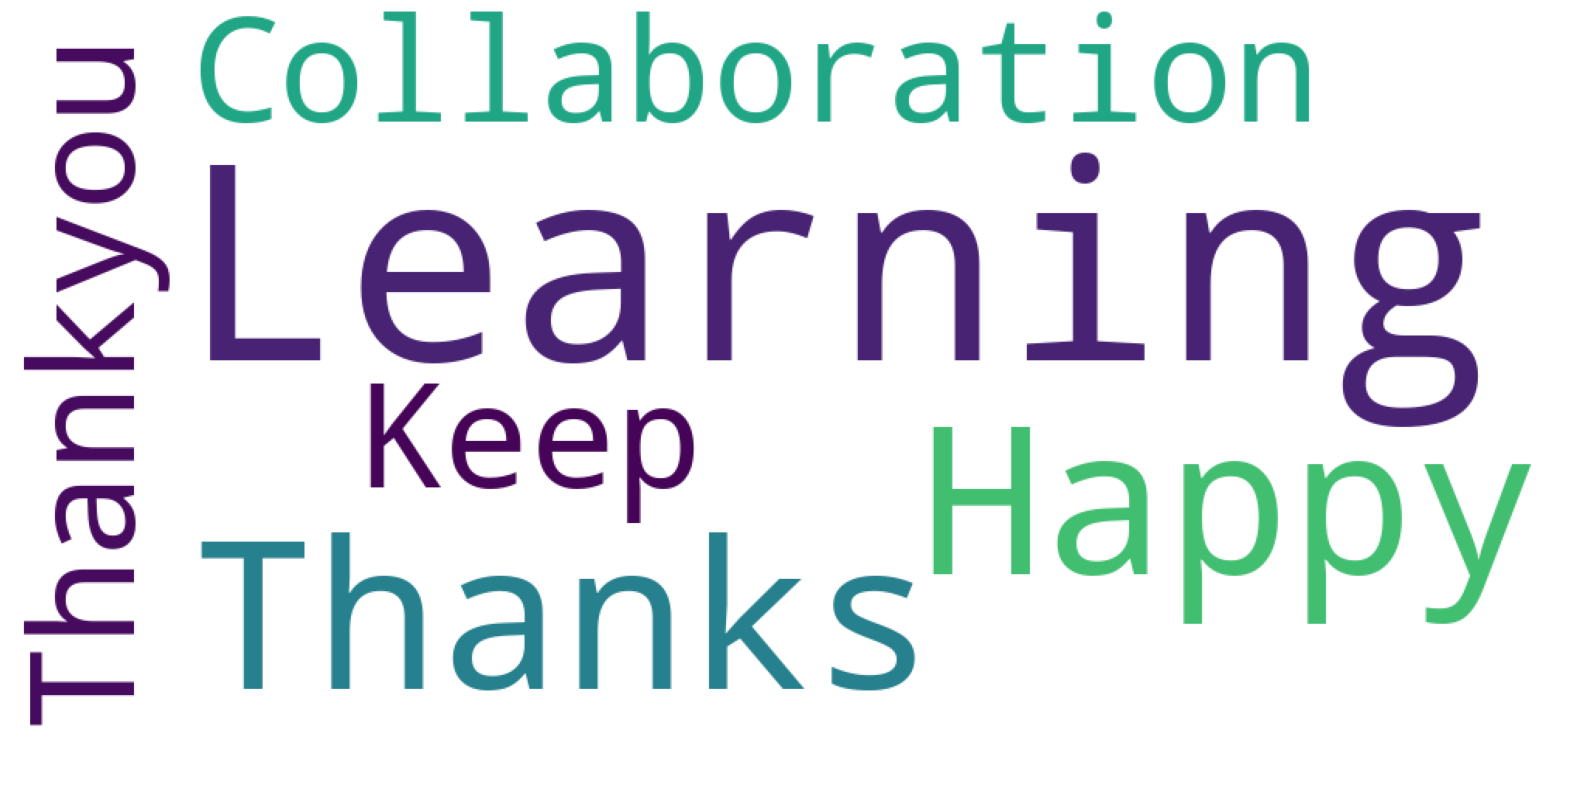

In [284]:
thank_you_str="Thanks,Happy Learning,Collaboration,Thankyou,Keep Learning"
# create WordCloud with converted string
wordcloud = WordCloud(width = 1000, height = 500, random_state=1, background_color='white', collocations=True).generate(thank_you_str)
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()